## Load the dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Judiciary Employee Work Environment Satisfaction Survey\Judiciary Employee Work Environment Satisfaction Survey.csv')

# Display the first few rows
display(df.head())

<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
C:\Users\USER\AppData\Local\Temp\ipykernel_2956\3846966594.py:4: SyntaxWarning: invalid escape sequence '\J'
  df = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Judiciary Employee Work Environment Satisfaction Survey\Judiciary Employee Work Environment Satisfaction Survey.csv')


,Timestamp,1. Current designation,2.(a) Which Directorate/Court Station are you currently working at?,2.(b) Type of Court/ Adminstrative Unit,3. How long have you worked in the Judiciary (Tick one),4. What is your Gender? (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint?,...,1. I am aware of the Psychosocial Support services provided by the Judiciary,Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?,1. I am familiar with the sexual harassment policy for the Judiciary,2. Have you experienced sexual harassment?,Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?],Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment,Email Address,Column 43,Column 44
0,11/3/2024 18:11:40,Judge,Molo Law Courts,Magistrate Court,5 -10 Years,Male,33-42,Graduate,YES,NO,...,YES,Disagree,Decentralise,Yes,Yes,Agree,Improve terms of service,NaN,NaN,NaN
1,11/3/2024 18:26:08,Law Clerk/Researcher,Bomet,High Court,11- 15 Years,Female,43-52,Secondary (O&A Level),YES,YES,...,YES,Agree,Xxxx,No,No,Agree,Xxxxx,vlumumba85@gmail.com,NaN,NaN
2,11/3/2024 21:00:04,Staff,DPOP,Supreme Court,Less than 5 years,Female,23-32,Secondary (O&A Level),NO,NO,...,YES,Strongly Agree,test,Yes,Yes,Strongly Agree,test,christineogari@gmail.com,NaN,NaN
3,11/5/2024 10:06:29,Law Clerk/Researcher,Kisumu,Magistrate Court,5 -10 Years,Male,43-52,Graduate,YES,YES,...,YES,Agree,Creating more awerness,Yes,No,Strongly Agree,By providing suggestion boxes for any complain...,donjacobnandi@gmail.com,NaN,NaN
4,11/14/2024 14:21:25,Magistrate,Kakuma court,Magistrate Court,11- 15 Years,Male,43-52,Graduate,YES,YES,...,YES,Disagree,Visibility,Yes,No,Agree,Fairness,charlesmayamba88@gmail.com,NaN,NaN


## 1. Handle missing data
### 1.1 Identify missing values

In [5]:
# Identify columns with missing values
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
display(missing_values)

2.(a) Which Directorate/Court Station are you currently working at?                                                                                  5
3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)                                                                 324
3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)                                                                  318
4. How can the Judiciary improve on training and development of staff?                                                                               2
2. How can Judiciary improve the Performance Management System                                                                                      27
4.How can the Judiciary improve work environment                                                                                                    11
3.What are your suggestions for the improvement of psychosocial support services in the Judici

### 1.2 Handle missing values

In [6]:
# Handle missing values

# Columns with a small number of missing values and are likely categorical or free text:
# - '2.(a) Which Directorate/Court Station are you currently working at?' (5 missing): Impute with mode as it's a location.
# - '4. How can the Judiciary improve on training and development of staff?' (2 missing): Impute with a placeholder like 'No suggestion' as it's free text.
# - '2. How can Judiciary improve the Performance Management System' (27 missing): Impute with a placeholder like 'No suggestion' as it's free text.
# - '4.How can the Judiciary improve work environment' (11 missing): Impute with a placeholder like 'No suggestion' as it's free text.
# - '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?' (61 missing): Impute with a placeholder like 'No suggestion' as it's free text.
# - 'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment' (71 missing): Impute with a placeholder like 'No suggestion' as it's free text.

for col in ['4. How can the Judiciary improve on training and development of staff?',
            '2. How can Judiciary improve the Performance Management System',
            '4.How can the Judiciary improve work environment',
            '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?',
            'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment']:
    df[col] = df[col].fillna('No suggestion')

df['2.(a) Which Directorate/Court Station are you currently working at?'] = df['2.(a) Which Directorate/Court Station are you currently working at?'].fillna(df['2.(a) Which Directorate/Court Station are you currently working at?'].mode()[0])


# Columns with a significant number of missing values that are numerical but contain non-numeric entries:
# - '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)' (324 missing): Convert to numeric, then impute with median.
# - '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)' (318 missing): Convert to numeric, then impute with median.

# Convert columns to numeric, coercing errors
df['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)'] = pd.to_numeric(df['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)'], errors='coerce')
df['3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'] = pd.to_numeric(df['3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'], errors='coerce')

# Impute missing values with the median after conversion
df['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)'] = df['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)'].fillna(df['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)'].median())
df['3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'] = df['3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'].fillna(df['3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'].median())

# Columns with a very high number of missing values and are not critical for analysis:
# - 'Email Address' (520 missing): Drop the column as it's an identifier and has many missing values.
# - 'Column 43' (1104 missing): Drop the column as it has almost all values missing.
# - 'Column 44' (1114 missing): Drop the column as it has all values missing.

df = df.drop(columns=['Email Address', 'Column 43', 'Column 44'])

# Verify that missing values have been handled
missing_values_after_handling = df.isnull().sum()
missing_values_after_handling = missing_values_after_handling[missing_values_after_handling > 0]

display(missing_values_after_handling)

Series([], dtype: int64)

## 2. Remove duplicates

In [7]:
# Identify duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows found
print(f"Number of duplicate rows found: {duplicate_rows}")

# Remove the duplicate rows
df = df.drop_duplicates()

# Verify that duplicate rows have been removed
duplicate_rows_after_removal = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after_removal}")

Number of duplicate rows found: 0
Number of duplicate rows after removal: 0


## 3. Standardize text formatting

In [8]:
# Identify columns that are likely text data (object dtype)
text_columns = df.select_dtypes(include='object').columns

# Exclude the 'Timestamp' column as it will be handled separately
text_columns = text_columns.drop('Timestamp', errors='ignore')

# Apply text cleaning operations to identified text columns
for col in text_columns:
    # Ensure the column is treated as string type before applying string methods
    df[col] = df[col].astype(str)
    # Convert to lowercase
    df[col] = df[col].str.lower()
    # Remove leading and trailing whitespace
    df[col] = df[col].str.strip()
    # Replace multiple internal spaces with a single space
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

# Display unique values or first few rows of cleaned text columns for verification
for col in text_columns:
    print(f"Unique values for column '{col}':")
    display(df[col].unique()[:10]) # Display up to 10 unique values
    print("\n")


Unique values for column '1. Current designation':


array(['judge', 'law clerk/researcher', 'staff', 'magistrate',
       'registrar', 'k', 'kadhi'], dtype=object)



Unique values for column '2.(a) Which Directorate/Court Station are you currently working at?':


array(['molo law courts', 'bomet', 'dpop', 'kisumu', 'kakuma court',
       'kitale', 'hrmda', 'court annexed mediation', 'embu law courts',
       'nyeri'], dtype=object)



Unique values for column '2.(b)  Type of Court/ Adminstrative Unit':


array(['magistrate court', 'high court', 'supreme court', 'elc',
       'small claims', 'e&lrc', 'court of appeal', 'tribunals',
       'kadhi court', 'office'], dtype=object)



Unique values for column '3. How long have you worked in the Judiciary (Tick one)':


array(['5 -10 years', '11- 15 years', 'less than 5 years',
       '16 - 20 years', 'over 25 years', '21 - 25 years', '11 - 15 years',
       '21- 25 years'], dtype=object)



Unique values for column '4. What is your Gender? (Tick one)':


array(['male', 'female', 'intersex'], dtype=object)



Unique values for column '5. Which age (in years) category do you belong to?  (Tick one)':


array(['33-42', '43-52', '23-32', 'above 53', 'below 22'], dtype=object)



Unique values for column '6. What is your highest level of education (Tick one)':


array(['graduate', 'secondary (o&a level)', 'diploma', 'college level',
       'post graduate', 'masters',
       'certificate in computer application packages', 'primary level',
       'certified public accountant of kenya', 'higher diploma'],
      dtype=object)



Unique values for column '1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?':


array(['yes', 'no'], dtype=object)



Unique values for column '2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? ':


array(['no', 'yes'], dtype=object)



Unique values for column 'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]':


array(['strongly agree', 'agree', 'strongly disagree', 'disagree'],
      dtype=object)



Unique values for column 'B. Job Satisfaction and Workload [My workload is manageable]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column '3. My work contributes to the achievement of the Judiciary’s goals':


array(['yes', 'no'], dtype=object)



Unique values for column '1. I am satisfied with the training and development opportunities provided by the Judiciary':


array(['yes', 'no'], dtype=object)



Unique values for column 'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column '4. How can the Judiciary improve on training and development of staff?':


array(['xxxxx', 'xxxxxxxx', 'train us', 'by funding more trainings',
       'consider far flung areas',
       'publish trainings schedule in advance for proper planning',
       'ensure all staff undergo a three days training',
       'develop a curriculum for each department and sensitize staff on staj',
       'by ensuring all officers are given equal opportunities for training',
       'the judiciary should have a training plan/policy. what i have seen are sensitization workshops'],
      dtype=object)



Unique values for column 'D. Remuneration and Benefits [My remuneration is fair and competitive]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]':


array(['agree', 'strongly agree', 'strongly disagree', 'disagree'],
      dtype=object)



Unique values for column 'E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'E. Promotion and Career progression [I have an established career path at the Judiciary]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'F. Communication [There is effective information flow between Management and staff]':


array(['disagree', 'strongly agree', 'agree', 'strongly disagree'],
      dtype=object)



Unique values for column 'F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]':


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)



Unique values for column '3. I often receive constructive feedback from my supervisor':


array(['yes', 'no'], dtype=object)



Unique values for column '1. Performance management and measurement initiatives are clear and comprehensive':


array(['disagree', 'strongly agree', 'agree', 'strongly disagree'],
      dtype=object)



Unique values for column '2. How can Judiciary improve the Performance Management System':


array(['improve the matrix to mirror the changing work environment',
       'xxxx', 'train', 'by using the latest technologies',
       'pmmu cycle has lost relevance with the advent of ict',
       'simplify the system', 'timeliness in cascading the pmmu',
       'propose on digitizing the pms',
       'by ensuring that there is seamless criteria for measurement of performance.',
       'as it is. no need for change'], dtype=object)



Unique values for column 'Work Environment (Office and Equipment) [I have the equipment to do my job]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column '3. The work environment is friendly for Persons living with Disabilities':


array(['yes', 'no'], dtype=object)



Unique values for column '4.How can the Judiciary improve work environment':


array(['make it flexible', 'xxx', 'test',
       'adding more security personnel',
       'infrastructure development needs to be a priority',
       'improve court premises by refurbishment',
       'cloakrooms need to be adjusted',
       'designate security officers the building in the corridors',
       'by ensuring that the work environment if friendly to all employees including those living with disability especially by providing lifts to storey court buildings.',
       'the judiciary should consider security at the work place at all costs'],
      dtype=object)



Unique values for column 'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]':


array(['strongly agree', 'agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]':


array(['strongly agree', 'agree', 'strongly disagree', 'disagree'],
      dtype=object)



Unique values for column 'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]':


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)



Unique values for column '1. I am aware of the Psychosocial Support services provided by the Judiciary':


array(['yes', 'no'], dtype=object)



Unique values for column 'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]':


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)



Unique values for column '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?':


array(['decentralise', 'xxxx', 'test', 'creating more awerness',
       'visibility', 'the same should be decentralized',
       'it should be devolved to court station level',
       'sensitize staff on the services have annual meetings on the same',
       'i suggest that the psychosocial support be devolved to county level to benefit all the judiciary staff.',
       'it is doing great.'], dtype=object)



Unique values for column '1. I am familiar with the sexual harassment policy for the Judiciary  ':


array(['yes', 'no'], dtype=object)



Unique values for column '2. Have you experienced sexual harassment?':


array(['yes', 'no'], dtype=object)



Unique values for column 'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)



Unique values for column 'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment':


array(['improve terms of service', 'xxxxx', 'test',
       'by providing suggestion boxes for any complaints by employees',
       'fairness', 'improve terms and conditions of service',
       'survey after every six months, also occasional one on one interviews',
       'visiting stations physically',
       'i suggest that promotions and elevations to higher courts for judgeship be based on merit and individual officers performance.',
       '1: better pay 2: when an employee is transferred, the transfer letter must indicate whether the employee is entitled to transfer allowance and or baggage and if not, reasons to be given. 3: financial support to the stations to allow timely purchase of office stationary, timely dsa etc 4: security for judicial officers 5: need to buy station vehicles'],
      dtype=object)

## 4. Check for and fix logical errors

In [ ]:
# Print the column names with indices again to be absolutely sure of the correct indices.
print("DataFrame Columns with Indices:")
for i, col in enumerate(df.columns):
    print(f"Index: {i}, Column: {col}")

# Based on the printed output, update the indices for all relevant columns.
# From the output:
age_column_index = 6
experience_column_index = 4
staj_aware_column_index = 8
staj_sensitized_column_index = 9
psychosocial_aware_column_index = 35
psychosocial_effective_column_index = 36
harassment_familiar_column_index = 38
harassment_handling_column_index = 40


# It is logically inconsistent for someone in the '18-22' age group to have more than 'less than 5 years' experience.
# Use .iloc to access columns by index
inconsistent_age_experience = df[
    ((df.iloc[:, age_column_index] == '18-22') &
    (df.iloc[:, experience_column_index].isin(['5 -10 years', '11- 15 years', '16- 20 years', '21- 25 years', 'above 25 years'])))
]

print("Rows with potential age and experience inconsistencies (Age 18-22 but experience > 5 years):")
display(inconsistent_age_experience)

# Check for inconsistencies in STAJ awareness and sensitization.
inconsistent_staj_awareness_sensitization = df[
    (df.iloc[:, staj_aware_column_index] == 'no') &
    (df.iloc[:, staj_sensitized_column_index] == 'yes')
]

print("Rows with inconsistent STAJ awareness and sensitization responses (Awareness = No, Sensitization = Yes):")
display(inconsistent_staj_awareness_sensitization)

# Check for inconsistencies in Psychosocial Support awareness and effectiveness rating.
inconsistent_psychosocial_awareness_rating = df[
    (df.iloc[:, psychosocial_aware_column_index] == 'no') &
    (df.iloc[:, psychosocial_effective_column_index].isin(['strongly agree', 'agree', 'neutral', 'disagree', 'strongly disagree']))
]

print("Rows with inconsistent Psychosocial Support awareness and effectiveness rating (Awareness = No, Rated Effectiveness):")
display(inconsistent_psychosocial_awareness_rating)

# Check for inconsistencies in Sexual Harassment policy familiarity and handling rating.
inconsistent_sexual_harassment_familiarity_rating = df[
    (df.iloc[:, harassment_familiar_column_index] == 'no') &
    (df.iloc[:, harassment_handling_column_index].isin(['strongly agree', 'agree', 'neutral', 'disagree', 'strongly disagree']))
]

print("Rows with inconsistent Sexual Harassment policy familiarity and handling rating (Familiarity = No, Rated Handling):")
display(inconsistent_sexual_harassment_familiarity_rating)

# No automatic corrections are being applied in this step due to the nature of the inconsistencies.
# The goal is to identify and report them.

DataFrame Columns with Indices:
Index: 0, Column: Timestamp
Index: 1, Column: 1. Current designation
Index: 2, Column: 2.(a) Which Directorate/Court Station are you currently working at?
Index: 3, Column: 2.(b)  Type of Court/ Adminstrative Unit
Index: 4, Column: 3. How long have you worked in the Judiciary (Tick one)
Index: 5, Column: 4. What is your Gender? (Tick one)
Index: 6, Column: 5. Which age (in years) category do you belong to?  (Tick one)
Index: 7, Column: 6. What is your highest level of education (Tick one)
Index: 8, Column: 1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?
Index: 9, Column: 2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? 
Index: 10, Column: B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]
Index: 11, Column: B. Job Satisfaction and Workload [My workload is manageable]
Index: 12, Column: 3. My work contributes to the achieveme

,Timestamp,1. Current designation,2.(a) Which Directorate/Court Station are you currently working at?,2.(b) Type of Court/ Adminstrative Unit,3. How long have you worked in the Judiciary (Tick one),4. What is your Gender? (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint?,...,Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life],Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due],Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees],1. I am aware of the Psychosocial Support services provided by the Judiciary,Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?,1. I am familiar with the sexual harassment policy for the Judiciary,2. Have you experienced sexual harassment?,Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?],Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment


Rows with inconsistent STAJ awareness and sensitization responses (Awareness = No, Sensitization = Yes):


,Timestamp,1. Current designation,2.(a) Which Directorate/Court Station are you currently working at?,2.(b) Type of Court/ Adminstrative Unit,3. How long have you worked in the Judiciary (Tick one),4. What is your Gender? (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint?,...,Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life],Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due],Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees],1. I am aware of the Psychosocial Support services provided by the Judiciary,Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?,1. I am familiar with the sexual harassment policy for the Judiciary,2. Have you experienced sexual harassment?,Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?],Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment
813,2/13/2025 15:57:57,staff,tamu law courts,magistrate court,less than 5 years,male,43-52,graduate,no,yes,...,strongly agree,strongly agree,disagree,no,disagree,create awareness and sensitization to all memb...,yes,no,strongly agree,"improve remuneration, provide mortgages and ca..."


Rows with inconsistent Psychosocial Support awareness and effectiveness rating (Awareness = No, Rated Effectiveness):


,Timestamp,1. Current designation,2.(a) Which Directorate/Court Station are you currently working at?,2.(b) Type of Court/ Adminstrative Unit,3. How long have you worked in the Judiciary (Tick one),4. What is your Gender? (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint?,...,Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life],Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due],Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees],1. I am aware of the Psychosocial Support services provided by the Judiciary,Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?,1. I am familiar with the sexual harassment policy for the Judiciary,2. Have you experienced sexual harassment?,Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?],Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment
7,11/14/2024 14:35:27,staff,court annexed mediation,high court,less than 5 years,female,23-32,diploma,yes,no,...,agree,agree,strongly disagree,no,disagree,sensitize staff on the services have annual me...,no,no,agree,visiting stations physically
20,11/14/2024 14:58:53,staff,ict,magistrate court,5 -10 years,male,23-32,diploma,yes,yes,...,agree,strongly agree,strongly agree,no,disagree,liaison officers in court stations to deal wit...,yes,no,agree,training needs.
25,11/14/2024 15:23:12,staff,lamu law courts,magistrate court,5 -10 years,male,33-42,graduate,yes,no,...,disagree,agree,strongly disagree,no,disagree,they should be visiting court stations and fin...,yes,no,agree,implement career progression fully as it was a...
27,11/14/2024 15:23:25,staff,machakos,high court,less than 5 years,male,33-42,graduate,yes,yes,...,disagree,agree,strongly disagree,no,disagree,no suggestion,yes,no,strongly agree,no suggestion
31,11/14/2024 15:31:07,law clerk/researcher,nyamira law courts,high court,less than 5 years,male,23-32,graduate,yes,yes,...,agree,disagree,strongly disagree,no,disagree,bi-annual team building and reshuffling of sta...,yes,no,agree,"as compared to our colleagues in parliament, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2/25/2025 18:41:21,staff,kitui law courts,magistrate court,5 -10 years,male,23-32,secondary (o&a level),yes,no,...,disagree,agree,strongly disagree,no,disagree,let the unit be in every court station,yes,no,agree,to listen to the views on the grassroots
1094,2/27/2025 15:13:40,staff,ngong law courts,magistrate court,less than 5 years,male,33-42,graduate,yes,no,...,disagree,agree,agree,no,agree,organizing more visits at the court station.,yes,no,disagree,career growth path should be revised
1096,2/28/2025 17:22:56,staff,kahawa law court,magistrate court,over 25 years,female,23-32,secondary (o&a level),yes,no,...,strongly agree,strongly agree,agree,no,disagree,nil,yes,no,strongly agree,considering staff environment before transfer
1110,4/11/2025 11:04:31,staff,dspop,directorate,less than 5 years,male,33-42,graduate,yes,no,...,disagree,agree,agree,no,strongly disagree,have well trained and active members and not j...,yes,no,strongly disagree,develop a robust team to handle arising querries


Rows with inconsistent Sexual Harassment policy familiarity and handling rating (Familiarity = No, Rated Handling):


,Timestamp,1. Current designation,2.(a) Which Directorate/Court Station are you currently working at?,2.(b) Type of Court/ Adminstrative Unit,3. How long have you worked in the Judiciary (Tick one),4. What is your Gender? (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint?,...,Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life],Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due],Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees],1. I am aware of the Psychosocial Support services provided by the Judiciary,Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?,1. I am familiar with the sexual harassment policy for the Judiciary,2. Have you experienced sexual harassment?,Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?],Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment
1,11/3/2024 18:26:08,law clerk/researcher,bomet,high court,11- 15 years,female,43-52,secondary (o&a level),yes,yes,...,agree,agree,agree,yes,agree,xxxx,no,no,agree,xxxxx
7,11/14/2024 14:35:27,staff,court annexed mediation,high court,less than 5 years,female,23-32,diploma,yes,no,...,agree,agree,strongly disagree,no,disagree,sensitize staff on the services have annual me...,no,no,agree,visiting stations physically
15,11/14/2024 14:51:28,staff,hr,supreme court,11- 15 years,female,43-52,graduate,yes,no,...,disagree,strongly disagree,strongly disagree,yes,disagree,the section needs to be decentralised to reach...,no,no,agree,equity of resource allocation and training opp...
36,11/14/2024 15:36:18,staff,malaba,magistrate court,5 -10 years,male,33-42,diploma,yes,no,...,disagree,agree,strongly disagree,no,disagree,communication,no,no,disagree,staff centered
51,11/14/2024 16:05:50,staff,elrc nairobi,e&lrc,5 -10 years,female,33-42,diploma,yes,yes,...,agree,agree,agree,yes,agree,also conduct health and wellness workshops esp...,no,yes,agree,prioritise improvement of the working conditio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2/19/2025 12:35:45,staff,milimani,elc,less than 5 years,female,23-32,graduate,no,no,...,disagree,agree,disagree,yes,agree,there should be a list of courts within which ...,no,yes,disagree,the keeping of manual registers is outdated. a...
1088,2/25/2025 15:57:39,staff,kitui law court,magistrate court,less than 5 years,male,23-32,secondary (o&a level),yes,yes,...,strongly agree,strongly agree,strongly agree,yes,agree,good,no,no,strongly agree,we continue with the same bond we have between...
1097,3/3/2025 12:00:21,magistrate,nyahururu,magistrate court,5 -10 years,female,33-42,graduate,yes,no,...,disagree,disagree,disagree,yes,strongly disagree,decentralise the areas one can get help form m...,no,no,disagree,none
1101,4/9/2025 10:30:25,staff,office of the chief registrar,office,less than 5 years,male,23-32,graduate,yes,no,...,agree,strongly agree,strongly agree,yes,agree,no suggestion,no,no,agree,no suggestion


## 5. Split multiple-response questions into separate variables
### 5.1 Split multiple-response questions

In [12]:
# Examine a few relevant columns to confirm if they contain multiple responses within a single cell
# Based on the column names, potential candidates for multiple responses could be related to suggestions or comments,
# but these are typically free text. Other questions are single-choice.
# Let's look at some columns that might potentially have structured multiple responses,
# although the single-choice format of most questions suggests this is unlikely.

# Example columns to check (based on their names and the survey format):
# - '3. How long have you worked in the Judiciary (Tick one)' - This is explicitly tick one.
# - '5. Which age (in years) category do you belong to? (Tick one)' - This is explicitly tick one.
# - '6. What is your highest level of education (Tick one)' - This is explicitly tick one.
# - '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)' - Numerical input.
# - '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)' - Numerical input.
# - '4. How can the Judiciary improve on training and development of staff?' - Free text suggestion.
# - '2. How can Judiciary improve the Performance Management System' - Free text suggestion.
# - '4.How can the Judiciary improve work environment' - Free text suggestion.
# - '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?' - Free text suggestion.
# - 'Provide any comments and suggestions...' - Free text suggestion.

# Given the nature of the questions and the "Tick one" instruction for several,
# it is highly improbable that there are columns requiring splitting based on multiple selections within a cell.
# The "suggestion" columns are free-text and don't have a structured multiple-response format.

# To be absolutely sure, let's inspect a few columns to see if any cells contain delimiters like commas or semicolons
# that might indicate multiple selections, though based on the survey structure, this is not expected.
# We'll inspect columns that are not explicitly "Tick one" but are not free text suggestions either.
# Let's pick a few columns like the 'Employee wellness and Work Life Balance' series of questions.

wellness_cols = [col for col in df.columns if 'Employee wellness and Work Life Balance' in col]
psychosocial_cols = [col for col in df.columns if 'Psychosocial Support' in col and 'suggestions' not in col]
sexual_harassment_cols = [col for col in df.columns if 'Sexual Harassment' in col and 'suggestions' not in col]


# Function to check for potential delimiters in a column
def check_for_delimiters(dataframe, column_name, delimiters=[',', ';', '|']):
    contains_delimiter = False
    for delimiter in delimiters:
        if dataframe[column_name].astype(str).str.contains(delimiter).any():
            print(f"Column '{column_name}' contains delimiter '{delimiter}'.")
            contains_delimiter = True
    if not contains_delimiter:
        print(f"Column '{column_name}' does not appear to contain common delimiters for multiple responses.")

# Check a few columns
print("Checking sample columns for potential multiple response delimiters:")
for col in wellness_cols + psychosocial_cols + sexual_harassment_cols:
    check_for_delimiters(df, col)

# Based on this check and the nature of the survey questions, it is highly likely
# that there are no true multiple-response columns that need splitting.

Checking sample columns for potential multiple response delimiters:
Column 'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]' contains delimiter '|'.
Column 'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]' contains delimiter '|'.
Column 'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]' contains delimiter '|'.
Column '1. I am aware of the Psychosocial Support services provided by the Judiciary' contains delimiter '|'.
Column 'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]' contains delimiter '|'.
Column 'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]' contains delimiter '|'.


#### The previous check revealed that several columns contain the '|' delimiter, indicating that they might contain multiple responses despite the survey format suggesting single choices. This is unexpected and requires further investigation and potential splitting. I will now examine the unique values in these columns to understand the structure of the multiple responses and then proceed with splitting them into binary columns if needed.

### 5.2 Separate variables

In [13]:
# Examine the unique values in the columns identified as containing the '|' delimiter.
# This will help understand how the multiple responses are structured.

columns_with_delimiter = [
    'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]',
    'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]',
    'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]',
    '1. I am aware of the Psychosocial Support services provided by the Judiciary',
    'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]',
    'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]'
]

print("Unique values in columns with '|' delimiter:")
for col in columns_with_delimiter:
    print(f"\nUnique values for column '{col}':")
    # Display unique values. Convert to string and handle potential non-string types just in case.
    unique_vals = df[col].astype(str).unique()
    display(unique_vals)

# Based on the unique values, determine if splitting into binary columns is appropriate.
# If the delimiter separates distinct categories within a single cell, then splitting is needed.
# If the delimiter appears within what looks like a single response category, it might be a data entry issue.

Unique values in columns with '|' delimiter:

Unique values for column 'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]':


array(['strongly agree', 'agree', 'disagree', 'strongly disagree'],
      dtype=object)


Unique values for column 'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]':


array(['strongly agree', 'agree', 'strongly disagree', 'disagree'],
      dtype=object)


Unique values for column 'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]':


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)


Unique values for column '1. I am aware of the Psychosocial Support services provided by the Judiciary':


array(['yes', 'no'], dtype=object)


Unique values for column 'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]':


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)


Unique values for column 'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]':


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)

## 6. Encode categorical variables

In [ ]:
# Identify categorical columns for encoding
# Exclude Timestamp and free text suggestion columns, and any potentially high cardinality columns that are not identifiers.
# Let's review the columns and their unique values/data types again to make informed decisions.
print("Reviewing columns and their unique values/data types for encoding:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumn '{col}' (dtype: object):")
        # Display unique values or value counts for object columns to assess cardinality
        if df[col].nunique() < 50: # Display unique values if not too many
            display(df[col].unique())
        else: # Display value counts for higher cardinality columns
             print(f"Contains {df[col].nunique()} unique values. First 20 value counts:")
             display(df[col].value_counts().head(20))
    else:
        print(f"\nColumn '{col}' (dtype: {df[col].dtype}) - not an object column.")


# Based on the review, identify columns for ordinal and one-hot encoding.

# Ordinal Columns (Likert scale or ordered categories):
ordinal_cols = [
    '3. How long have you worked in the Judiciary (Tick one)', # Ordered experience levels
    '5. Which age (in years) category do you belong to?  (Tick one)', # Ordered age categories (note two spaces before (Tick one))
    '6. What is your highest level of education (Tick one)', # Ordered education levels (assume a general order)
    'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]', # Agreement levels
    'B. Job Satisfaction and Workload [My workload is manageable]', # Agreement levels
    '3. My work contributes to the achievement of the Judiciary’s goals', # Agreement levels
    '1. I am satisfied with the training and development opportunities provided by the Judiciary', # Agreement levels
    'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]', # Agreement levels
    'D. Remuneration and Benefits [My remuneration is fair and competitive]', # Agreement levels
    'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]', # Agreement levels
    'E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]', # Agreement levels
    'E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]', # Agreement levels
    'E. Promotion and Career progression [I have an established career path at the Judiciary]', # Agreement levels
    'F. Communication [There is effective information flow between Management and staff]', # Agreement levels
    'F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]', # Agreement levels
    '3. I often receive constructive feedback from my supervisor', # Agreement levels
    '1. Performance management and measurement initiatives are clear and comprehensive', # Agreement levels
    'Work Environment (Office and Equipment) [I have the equipment to do my job]', # Agreement levels
    'Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]', # Agreement levels
    '3. The work environment is friendly for Persons living with Disabilities', # Agreement levels
    'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]', # Agreement levels
    'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]', # Agreement levels
    'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]', # Agreement levels
    'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]', # Agreement levels
    'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]' # Agreement levels
]

# Define the order for ordinal encoding
# Experience levels
experience_order = ['less than 5 years', '5 -10 years', '11- 15 years', '16- 20 years', '21- 25 years', 'over 25 years']
# Age categories
age_order = ['18-22', '23-32', '33-42', '43-52', '53-62', 'above 62']
# Education levels (assuming a general hierarchy)
education_order = ['primary (kcpe)', 'secondary (o&a level)', 'college (certificate)', 'diploma', 'graduate', 'post graduate']
# Agreement levels (Likert scale)
agreement_order = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree']
# Awareness levels
awareness_order = ['no', 'yes']


# Apply Ordinal Encoding
for col in ordinal_cols:
    if col in ['3. How long have you worked in the Judiciary (Tick one)']:
        mapping = {level: i for i, level in enumerate(experience_order)}
    elif col in ['5. Which age (in years) category do you belong to? (Tick one)']:
        mapping = {level: i for i, level in enumerate(age_order)}
    elif col in ['6. What is your highest level of education (Tick one)']:
         mapping = {level: i for i, level in enumerate(education_order)}
    elif col in ['1. I am aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?',
                 '2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? ',
                 '1. I am aware of the Psychosocial Support services provided by the Judiciary',
                 '1. I am familiar with the sexual harassment policy for the Judiciary  ',
                 '2. Have you experienced sexual harassment?']: # Handle binary 'yes'/'no' awareness/experience questions
        mapping = {level: i for i, level in enumerate(awareness_order)}
    else: # Apply to Likert scale columns
        mapping = {level: i for i, level in enumerate(agreement_order)}

    # Ensure all unique values in the column are in the mapping to avoid errors
    unique_col_values = df[col].unique()
    for val in unique_col_values:
        if val not in mapping:
            # If a value is not in the defined order, assign it a NaN or handle as appropriate.
            # For simplicity here, we'll print a warning and let .map handle missing keys by producing NaN
            print(f"Warning: Value '{val}' in column '{col}' is not in the defined ordinal mapping.")

    df[col] = df[col].map(mapping)


# Nominal Columns (no inherent order):
# - '1. Current designation'
# - '2.(b) Type of Court/ Adminstrative Unit'
# - '4. What is your Gender? (Tick one)'

# Columns to exclude from one-hot encoding (free text, identifiers, or already handled):
exclude_cols = ['Timestamp',
                '2.(a) Which Directorate/Court Station are you currently working at?', # High cardinality location, treat as identifier or group later if needed
                '4. How can the Judiciary improve on training and development of staff?', # Free text
                '2. How can Judiciary improve the Performance Management System', # Free text
                '4.How can the Judiciary improve work environment', # Free text
                '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?', # Free text
                'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment' # Free text
               ] + ordinal_cols # Exclude columns already ordinally encoded


nominal_cols = [col for col in df.select_dtypes(include='object').columns if col not in exclude_cols]

# Apply One-Hot Encoding
# Use pd.get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True) # drop_first=True to avoid multicollinearity

# Display the first few rows of the DataFrame after encoding
display(df.head())

# Display the data types of the columns to verify encoding
print("\nData types after encoding:")
display(df.dtypes)

Reviewing columns and their unique values/data types for encoding:

Column 'Timestamp' (dtype: object):
Contains 1112 unique values. First 20 value counts:


Timestamp
11/14/2024 14:37:51    2
2/13/2025 11:47:16     2
2/13/2025 11:48:25     1
2/13/2025 12:09:47     1
2/13/2025 12:08:32     1
2/13/2025 11:56:46     1
2/13/2025 11:55:59     1
2/13/2025 11:50:16     1
2/13/2025 11:49:55     1
11/3/2024 18:11:40     1
2/13/2025 12:12:21     1
2/13/2025 11:43:21     1
2/13/2025 11:37:43     1
2/13/2025 11:26:54     1
2/13/2025 11:16:46     1
2/13/2025 11:15:25     1
2/13/2025 10:58:04     1
2/13/2025 12:11:01     1
2/13/2025 12:15:46     1
2/13/2025 10:56:59     1
Name: count, dtype: int64


Column '1. Current designation' (dtype: object):


array(['judge', 'law clerk/researcher', 'staff', 'magistrate',
       'registrar', 'k', 'kadhi'], dtype=object)


Column '2.(a) Which Directorate/Court Station are you currently working at?' (dtype: object):
Contains 468 unique values. First 20 value counts:


2.(a) Which Directorate/Court Station are you currently working at?
dspop                  18
mombasa                17
voi law courts         17
lamu law courts        14
ict                    13
milimani law courts    13
milimani               12
mavoko law courts      11
thika law courts       11
thika                  10
mutomo                 10
nakuru                 10
nyeri                  10
supreme court          10
maseno law courts       9
ruiru                   9
mombasa law courts      9
kakamega                9
meru                    9
ruiru law courts        8
Name: count, dtype: int64


Column '2.(b)  Type of Court/ Adminstrative Unit' (dtype: object):


array(['magistrate court', 'high court', 'supreme court', 'elc',
       'small claims', 'e&lrc', 'court of appeal', 'tribunals',
       'kadhi court', 'office', 'directorate'], dtype=object)


Column '3. How long have you worked in the Judiciary (Tick one)' (dtype: float64) - not an object column.

Column '4. What is your Gender? (Tick one)' (dtype: object):


array(['male', 'female', 'intersex'], dtype=object)


Column '5. Which age (in years) category do you belong to?  (Tick one)' (dtype: object):


array(['33-42', '43-52', '23-32', 'above 53', 'below 22'], dtype=object)


Column '6. What is your highest level of education (Tick one)' (dtype: object):


array(['graduate', 'secondary (o&a level)', 'diploma', 'college level',
       'post graduate', 'masters',
       'certificate in computer application packages', 'primary level',
       'certified public accountant of kenya', 'higher diploma',
       'masters degree', 'post graduate diploma',
       'post graduate adiploma & masters', 'cirtificate', 'degree',
       'certificate', 'postgraduate',
       'masters degree (counseling psychology)',
       'with post grauduate diploma', 'p1 teacher certificate', 'college',
       'secretarial college', 'certificate level', 'college certificate',
       'high diploma', 'llm', 'master degree', 'professional',
       'tertiary (certificate)', 'mba'], dtype=object)


Column '1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?' (dtype: object):


array(['yes', 'no'], dtype=object)


Column '2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? ' (dtype: object):


array(['no', 'yes'], dtype=object)


Column 'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]' (dtype: object):


array(['strongly agree', 'agree', 'strongly disagree', 'disagree'],
      dtype=object)


Column 'B. Job Satisfaction and Workload [My workload is manageable]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column '3. My work contributes to the achievement of the Judiciary’s goals' (dtype: object):


array(['yes', 'no'], dtype=object)


Column '1. I am satisfied with the training and development opportunities provided by the Judiciary' (dtype: object):


array(['yes', 'no'], dtype=object)


Column 'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)' (dtype: float64) - not an object column.

Column '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)' (dtype: float64) - not an object column.

Column '4. How can the Judiciary improve on training and development of staff?' (dtype: object):
Contains 1090 unique values. First 20 value counts:


4. How can the Judiciary improve on training and development of staff?
more training                                                                                                                                           5
.                                                                                                                                                       4
more trainings                                                                                                                                          3
regular trainings                                                                                                                                       3
funding                                                                                                                                                 3
by sponsoring the staff                                                                                                                                 2
motiv


Column 'D. Remuneration and Benefits [My remuneration is fair and competitive]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]' (dtype: object):


array(['agree', 'strongly agree', 'strongly disagree', 'disagree'],
      dtype=object)


Column 'E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'E. Promotion and Career progression [I have an established career path at the Judiciary]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'F. Communication [There is effective information flow between Management and staff]' (dtype: object):


array(['disagree', 'strongly agree', 'agree', 'strongly disagree'],
      dtype=object)


Column 'F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]' (dtype: object):


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)


Column '3. I often receive constructive feedback from my supervisor' (dtype: object):


array(['yes', 'no'], dtype=object)


Column '1. Performance management and measurement initiatives are clear and comprehensive' (dtype: object):


array(['disagree', 'strongly agree', 'agree', 'strongly disagree'],
      dtype=object)


Column '2. How can Judiciary improve the Performance Management System' (dtype: object):
Contains 1029 unique values. First 20 value counts:


2. How can Judiciary improve the Performance Management System
no suggestion                       27
.                                   12
training                             9
sensitization                        5
no idea                              4
trainings                            4
through trainings                    4
by training staff                    3
nil                                  3
training staff                       3
train staff                          2
training and sensitization           2
through training                     2
it's ok                              2
team work                            2
not sure                             2
through training and development     2
na                                   2
motivation                           2
more training                        2
Name: count, dtype: int64


Column 'Work Environment (Office and Equipment) [I have the equipment to do my job]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column '3. The work environment is friendly for Persons living with Disabilities' (dtype: object):


array(['yes', 'no'], dtype=object)


Column '4.How can the Judiciary improve work environment' (dtype: object):
Contains 1082 unique values. First 20 value counts:


4.How can the Judiciary improve work environment
no suggestion                                                                             11
.                                                                                          7
improve on infrastructure                                                                  3
nil                                                                                        3
training                                                                                   3
provide security                                                                           2
by improving infrastructure                                                                2
providing adequate equipment                                                               2
none                                                                                       2
by                                                                                         2
building more courts 


Column 'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]' (dtype: object):


array(['strongly agree', 'agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]' (dtype: object):


array(['strongly agree', 'agree', 'strongly disagree', 'disagree'],
      dtype=object)


Column 'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]' (dtype: object):


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)


Column '1. I am aware of the Psychosocial Support services provided by the Judiciary' (dtype: object):


array(['yes', 'no'], dtype=object)


Column 'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]' (dtype: object):


array(['disagree', 'agree', 'strongly agree', 'strongly disagree'],
      dtype=object)


Column '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?' (dtype: object):
Contains 961 unique values. First 20 value counts:


3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?
no suggestion             63
.                         19
none                      14
nil                       11
training                   5
n/a                        5
sensitization              5
create awareness           5
more training              5
no comment                 4
i don't know               4
so far so good             4
no idea                    4
more trainings             3
awareness                  3
good                       3
more sensitization         3
h                          2
n                          2
create more awareness.     2
Name: count, dtype: int64


Column '1. I am familiar with the sexual harassment policy for the Judiciary  ' (dtype: object):


array(['yes', 'no'], dtype=object)


Column '2. Have you experienced sexual harassment?' (dtype: object):


array(['yes', 'no'], dtype=object)


Column 'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]' (dtype: object):


array(['agree', 'strongly agree', 'disagree', 'strongly disagree'],
      dtype=object)


Column 'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment' (dtype: object):
Contains 986 unique values. First 20 value counts:


Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment
no suggestion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 72
none                                                                                                                                                                                                                                                                                    

,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
0,11/3/2024 18:11:40,molo law courts,NaN,NaN,4.0,4,3,NaN,NaN,3,...,False,False,False,False,True,True,False,True,True,True
1,11/3/2024 18:26:08,bomet,NaN,NaN,1.0,4,4,NaN,NaN,3,...,False,False,False,False,False,True,True,True,False,False
2,11/3/2024 21:00:04,dpop,NaN,NaN,1.0,4,4,NaN,NaN,4,...,False,True,False,False,False,False,False,True,True,True
3,11/5/2024 10:06:29,kisumu,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False
4,11/14/2024 14:21:25,kakuma court,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False



Data types after encoding:


Timestamp                                                                                                                                          object
2.(a) Which Directorate/Court Station are you currently working at?                                                                                object
3. How long have you worked in the Judiciary (Tick one)                                                                                           float64
5. Which age (in years) category do you belong to?  (Tick one)                                                                                    float64
6. What is your highest level of education (Tick one)                                                                                             float64
B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]                                                            int64
B. Job Satisfaction and Workload [My workload is manageable]                

In [20]:
# Print the DataFrame's columns and their data types to verify the exact column names and dtypes.
print("DataFrame columns and dtypes before encoding attempt:")
display(df.dtypes)

# Re-identify categorical columns that are still of object type for encoding.
# Exclude Timestamp and free text suggestion columns, and any columns that are no longer objects.
object_cols_current = df.select_dtypes(include='object').columns

# Columns to exclude from encoding (Timestamp and free text suggestions)
exclude_cols_final = ['Timestamp',
                      '2.(a) Which Directorate/Court Station are you currently working at?', # High cardinality location, treat as identifier or group later if needed
                      '4. How can the Judiciary improve on training and development of staff?', # Free text
                      '2. How can Judiciary improve the Performance Management System', # Free text
                      '4.How can the Judiciary improve work environment', # Free text
                      '3.What are your suggestions for the improvement of psychosocial support services in the Judiciary?', # Free text
                      'Provide any comments and suggestions that can be used to advise the Judiciary leadership to improve employee satisfaction and work environment' # Free text
                     ]

# Filter object columns to include only those that need encoding
cols_to_encode = [col for col in object_cols_current if col not in exclude_cols_final]

print("\nObject columns identified for encoding:")
display(cols_to_encode)

# Based on the dtypes and the list of columns to encode, re-define ordinal and nominal columns and their mappings.
# Ensure mappings cover all unique values found in the object columns that are intended for ordinal encoding.

# Re-check unique values for the columns intended for ordinal encoding that are still objects.
print("\nUnique values in object columns intended for ordinal encoding:")
for col in cols_to_encode:
    # Check if the column name is one of the expected ordinal columns
    if col in ['5. Which age (in years) category do you belong to?  (Tick one)',
               '6. What is your highest level of education (Tick one)',
               'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]',
               'B. Job Satisfaction and Workload [My workload is manageable]',
               '3. My work contributes to the achievement of the Judiciary’s goals',
               '1. I am satisfied with the training and development opportunities provided by the Judiciary',
               'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]',
               'D. Remuneration and Benefits [My remuneration is fair and competitive]',
               'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]',
               'E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]',
               'E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]',
               'E. Promotion and Career progression [I have an established career path at the Judiciary]',
               'F. Communication [There is effective information flow between Management and staff]',
               'F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]',
               '3. I often receive constructive feedback from my supervisor',
               '1. Performance management and measurement initiatives are clear and comprehensive',
               'Work Environment (Office and Equipment) [I have the equipment to do my job]',
               'Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]',
               '3. The work environment is friendly for Persons living with Disabilities',
               'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]',
               'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]',
               'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]',
               '1. I am aware of the Psychosocial Support services provided by the Judiciary',
               'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]',
               '1. I am familiar with the sexual harassment policy for the Judiciary  ',
               '2. Have you experienced sexual harassment?',
               'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]']:
        print(f"\nUnique values for column '{col}':")
        display(df[col].unique())
    else:
         print(f"\nColumn '{col}' is not in the predefined list of ordinal columns.")
         display(df[col].unique()) # Display unique values for other object columns as well


# Based on the unique values displayed above, re-create the mappings for ordinal encoding.
# It appears '3. How long have you worked in the Judiciary (Tick one)' might have been converted to numeric,
# so it should not be in the list of object columns to encode.

# Updated Ordinal Columns and their mappings (only for columns that are still object dtype and are ordinal)
ordinal_cols_final = {
    '5. Which age (in years) category do you belong to?  (Tick one)': age_mapping, # Use the age_mapping defined previously
    '6. What is your highest level of education (Tick one)': education_mapping, # Use the education_mapping defined previously
    'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]': agreement_mapping,
    'B. Job Satisfaction and Workload [My workload is manageable]': agreement_mapping,
    '3. My work contributes to the achievement of the Judiciary’s goals': awareness_mapping,
    '1. I am satisfied with the training and development opportunities provided by the Judiciary': awareness_mapping,
    'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]': agreement_mapping,
    'D. Remuneration and Benefits [My remuneration is fair and competitive]': agreement_mapping,
    'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]': agreement_mapping,
    'E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]': agreement_mapping,
    'E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]': agreement_mapping,
    'E. Promotion and Career progression [I have an established career path at the Judiciary]': agreement_mapping,
    'F. Communication [There is effective information flow between Management and staff]': agreement_mapping,
    'F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]': agreement_mapping,
    '3. I often receive constructive feedback from my supervisor': agreement_mapping,
    '1. Performance management and measurement initiatives are clear and comprehensive': agreement_mapping,
    'Work Environment (Office and Equipment) [I have the equipment to do my job]': agreement_mapping,
    'Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]': agreement_mapping,
    '3. The work environment is friendly for Persons living with Disabilities': disability_friendly_mapping, # Use the specific mapping
    'Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]': agreement_mapping,
    'Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]': agreement_mapping,
    'Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]': agreement_mapping,
    '1. I am aware of the Psychosocial Support services provided by the Judiciary': awareness_mapping,
    'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]': agreement_mapping,
    '1. I am familiar with the sexual harassment policy for the Judiciary  ': awareness_mapping,
    '2. Have you experienced sexual harassment?': awareness_mapping,
    'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]': agreement_mapping
}


# Apply Ordinal Encoding only to columns that are in ordinal_cols_final and are still objects
for col, mapping in ordinal_cols_final.items():
    if col in df.columns and df[col].dtype == 'object':
        # Ensure all unique values in the column are in the mapping to avoid errors
        unique_col_values = df[col].unique()
        for val in unique_col_values:
            if val not in mapping:
                print(f"Warning: Value '{val}' in column '{col}' is not in the defined ordinal mapping. It will be mapped to NaN.")

        df[col] = df[col].map(mapping)
    elif col not in df.columns:
        print(f"Warning: Ordinal column '{col}' not found in DataFrame.")
    else:
        print(f"Info: Ordinal column '{col}' is no longer an object dtype, skipping ordinal encoding.")


# Identify remaining object columns for One-Hot Encoding
# These should be the nominal columns that were not ordinally encoded.
nominal_cols_final = [col for col in cols_to_encode if col not in ordinal_cols_final.keys()]

print("\nObject columns identified for nominal encoding:")
display(nominal_cols_final)


# Apply One-Hot Encoding
if nominal_cols_final: # Only apply if there are columns to encode
    df = pd.get_dummies(df, columns=nominal_cols_final, drop_first=True) # drop_first=True to avoid multicollinearity
else:
    print("\nNo nominal object columns found to encode.")


# Display the first few rows of the DataFrame after encoding
display(df.head())

# Display the data types of the columns to verify encoding
print("\nData types after encoding:")
display(df.dtypes)

DataFrame columns and dtypes before encoding attempt:


Timestamp                                                                                                                                          object
2.(a) Which Directorate/Court Station are you currently working at?                                                                                object
3. How long have you worked in the Judiciary (Tick one)                                                                                           float64
5. Which age (in years) category do you belong to?  (Tick one)                                                                                    float64
6. What is your highest level of education (Tick one)                                                                                             float64
B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]                                                            int64
B. Job Satisfaction and Workload [My workload is manageable]                


Object columns identified for encoding:


[]


Unique values in object columns intended for ordinal encoding:
Info: Ordinal column '5. Which age (in years) category do you belong to?  (Tick one)' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column '6. What is your highest level of education (Tick one)' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column 'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column 'B. Job Satisfaction and Workload [My workload is manageable]' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column '3. My work contributes to the achievement of the Judiciary’s goals' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column '1. I am satisfied with the training and development opportunities provided by the Judiciary' is no longer an object dtype, skipping ordinal encoding.
Info: Ordinal column 'Training

[]


No nominal object columns found to encode.


,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
0,11/3/2024 18:11:40,molo law courts,NaN,NaN,4.0,4,3,NaN,NaN,3,...,False,False,False,False,True,True,False,True,True,True
1,11/3/2024 18:26:08,bomet,NaN,NaN,1.0,4,4,NaN,NaN,3,...,False,False,False,False,False,True,True,True,False,False
2,11/3/2024 21:00:04,dpop,NaN,NaN,1.0,4,4,NaN,NaN,4,...,False,True,False,False,False,False,False,True,True,True
3,11/5/2024 10:06:29,kisumu,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False
4,11/14/2024 14:21:25,kakuma court,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False



Data types after encoding:


Timestamp                                                                                                                                          object
2.(a) Which Directorate/Court Station are you currently working at?                                                                                object
3. How long have you worked in the Judiciary (Tick one)                                                                                           float64
5. Which age (in years) category do you belong to?  (Tick one)                                                                                    float64
6. What is your highest level of education (Tick one)                                                                                             float64
B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]                                                            int64
B. Job Satisfaction and Workload [My workload is manageable]                

## 7. Convert date/time fields

In [21]:
# Convert 'Timestamp' column to datetime format
# Use errors='coerce' to turn unparseable dates into NaT
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Check for any NaT values created by coercion
nat_count = df['Timestamp'].isnull().sum()

# Print the number of NaT values found
print(f"Number of NaT values created in 'Timestamp' column: {nat_count}")

# Display the data type of the 'Timestamp' column after conversion
print("\nData type of 'Timestamp' column after conversion:")
display(df['Timestamp'].dtype)

# Display the first few rows of the DataFrame to show the updated format
print("\nFirst few rows of DataFrame with converted 'Timestamp' column:")
display(df.head())

Number of NaT values created in 'Timestamp' column: 0

Data type of 'Timestamp' column after conversion:


dtype('<M8[ns]')


First few rows of DataFrame with converted 'Timestamp' column:


,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
0,2024-11-03 18:11:40,molo law courts,NaN,NaN,4.0,4,3,NaN,NaN,3,...,False,False,False,False,True,True,False,True,True,True
1,2024-11-03 18:26:08,bomet,NaN,NaN,1.0,4,4,NaN,NaN,3,...,False,False,False,False,False,True,True,True,False,False
2,2024-11-03 21:00:04,dpop,NaN,NaN,1.0,4,4,NaN,NaN,4,...,False,True,False,False,False,False,False,True,True,True
3,2024-11-05 10:06:29,kisumu,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False
4,2024-11-14 14:21:25,kakuma court,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,True,True,False


## 8. Validate data quality and address outliers

In [23]:
import numpy as np

# Identify numerical columns
# Exclude the 'Timestamp' column as it's not a variable for outlier detection in this context
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Timestamp' in numerical_cols:
    numerical_cols.remove('Timestamp')

print("Numerical columns identified for outlier analysis:")
display(numerical_cols)

# Calculate key statistics for numerical columns
print("\nKey statistics for numerical columns:")
display(df[numerical_cols].describe())

Numerical columns identified for outlier analysis:


['3. How long have you worked in the Judiciary (Tick one)',
 '5. Which age (in years) category do you belong to?  (Tick one)',
 '6. What is your highest level of education (Tick one)',
 'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]',
 'B. Job Satisfaction and Workload [My workload is manageable]',
 '3. My work contributes to the achievement of the Judiciary’s goals',
 '1. I am satisfied with the training and development opportunities provided by the Judiciary',
 'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]',
 '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)',
 '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)',
 'D. Remuneration and Benefits [My remuneration is fair and competitive]',
 'D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retire


Key statistics for numerical columns:


,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded),3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored),...,3. I often receive constructive feedback from my supervisor,1. Performance management and measurement initiatives are clear and comprehensive,Work Environment (Office and Equipment) [I have the equipment to do my job],Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate],3. The work environment is friendly for Persons living with Disabilities,Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life],Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due],Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees],Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective],Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]
count,0.0,0.0,1067.000000,1114.000000,1114.000000,0.0,0.0,1114.000000,1114.000000,1114.000000,...,0.0,1114.000000,1114.000000,1114.000000,0.0,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,NaN,NaN,3.361762,3.163375,2.938959,NaN,NaN,2.157989,1.043088,1.039497,...,NaN,2.805206,2.427289,2.031418,NaN,2.620287,3.314183,2.248654,2.178636,2.873429
std,NaN,NaN,0.983141,0.926919,1.068982,NaN,NaN,1.387336,0.804263,0.730704,...,NaN,1.042980,1.249838,1.351815,NaN,1.178720,0.780511,1.396351,1.272224,0.967186
min,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.000000,3.000000,3.000000,NaN,NaN,1.000000,1.000000,1.000000,...,NaN,3.000000,1.000000,1.000000,NaN,1.000000,3.000000,1.000000,1.000000,3.000000
50%,NaN,NaN,4.000000,3.000000,3.000000,NaN,NaN,3.000000,1.000000,1.000000,...,NaN,3.000000,3.000000,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,3.000000
75%,NaN,NaN,4.000000,4.000000,4.000000,NaN,NaN,3.000000,1.000000,1.000000,...,NaN,3.000000,3.000000,3.000000,NaN,3.000000,4.000000,3.000000,3.000000,3.000000
max,NaN,NaN,5.000000,4.000000,4.000000,NaN,NaN,4.000000,15.000000,9.000000,...,NaN,4.000000,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000


Skipping visualization for column '3. How long have you worked in the Judiciary (Tick one)' due to insufficient non-null values (0).
Skipping visualization for column '5. Which age (in years) category do you belong to?  (Tick one)' due to insufficient non-null values (0).
Visualizing distribution for column: 6. What is your highest level of education (Tick one)


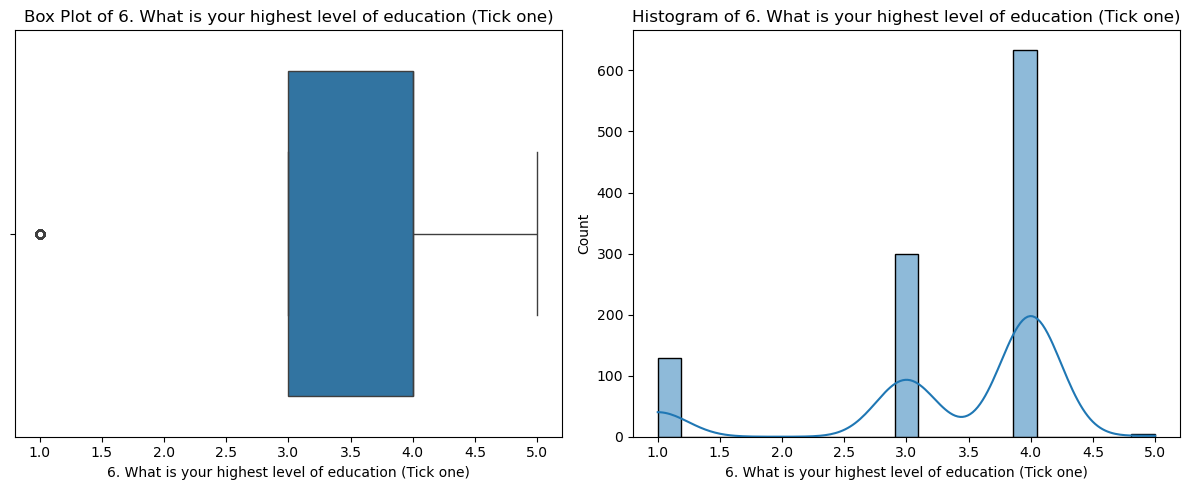

Visualizing distribution for column: B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]


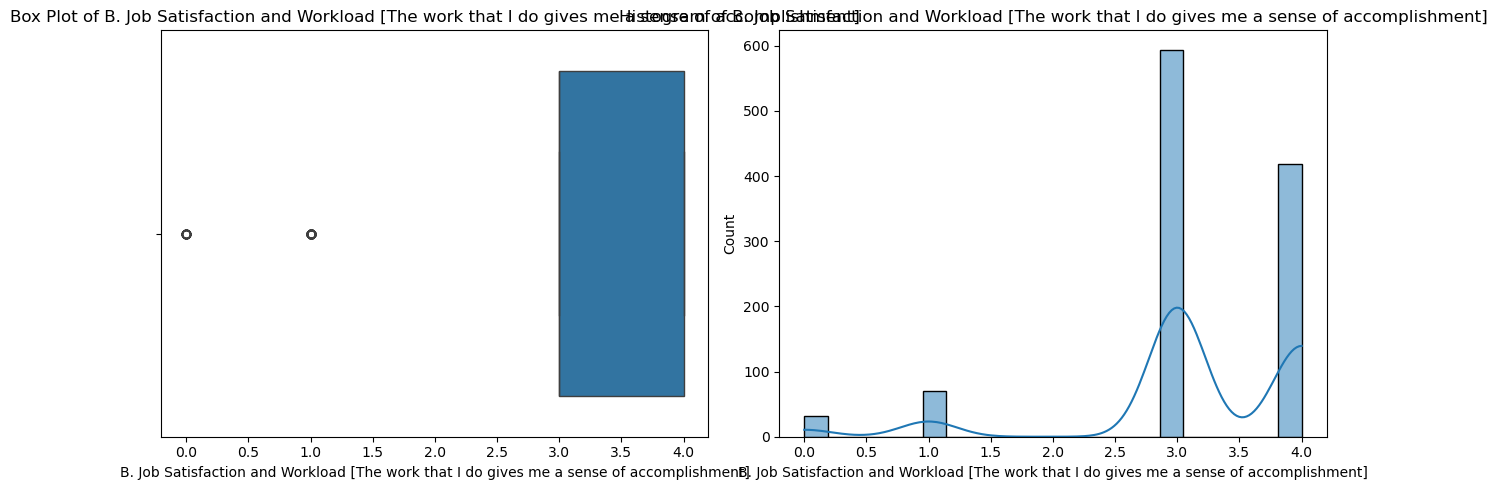

Visualizing distribution for column: B. Job Satisfaction and Workload [My workload is manageable]


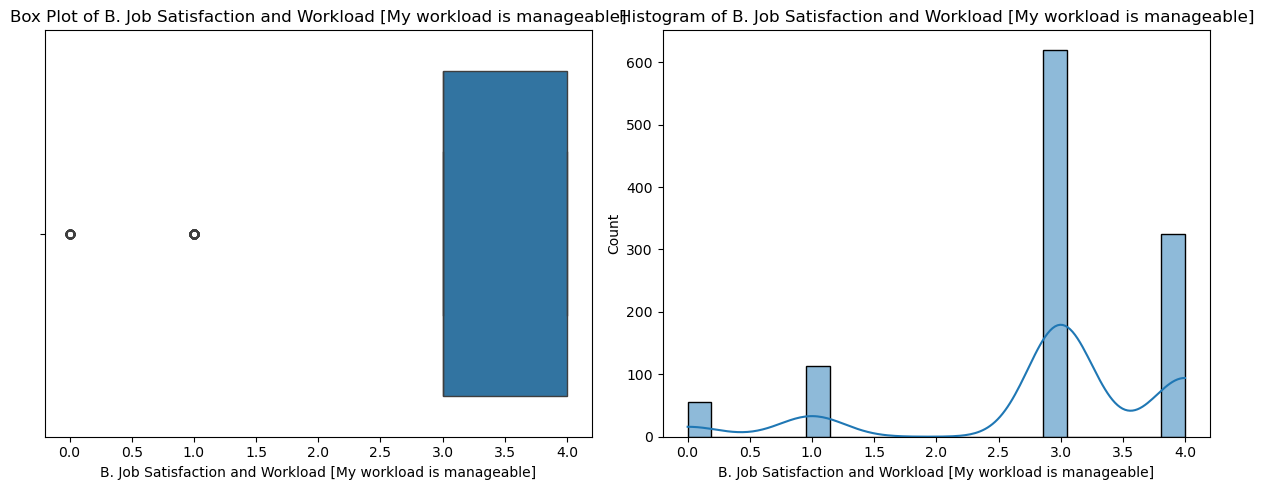

Skipping visualization for column '3. My work contributes to the achievement of the Judiciary’s goals' due to insufficient non-null values (0).
Skipping visualization for column '1. I am satisfied with the training and development opportunities provided by the Judiciary' due to insufficient non-null values (0).
Visualizing distribution for column: Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]


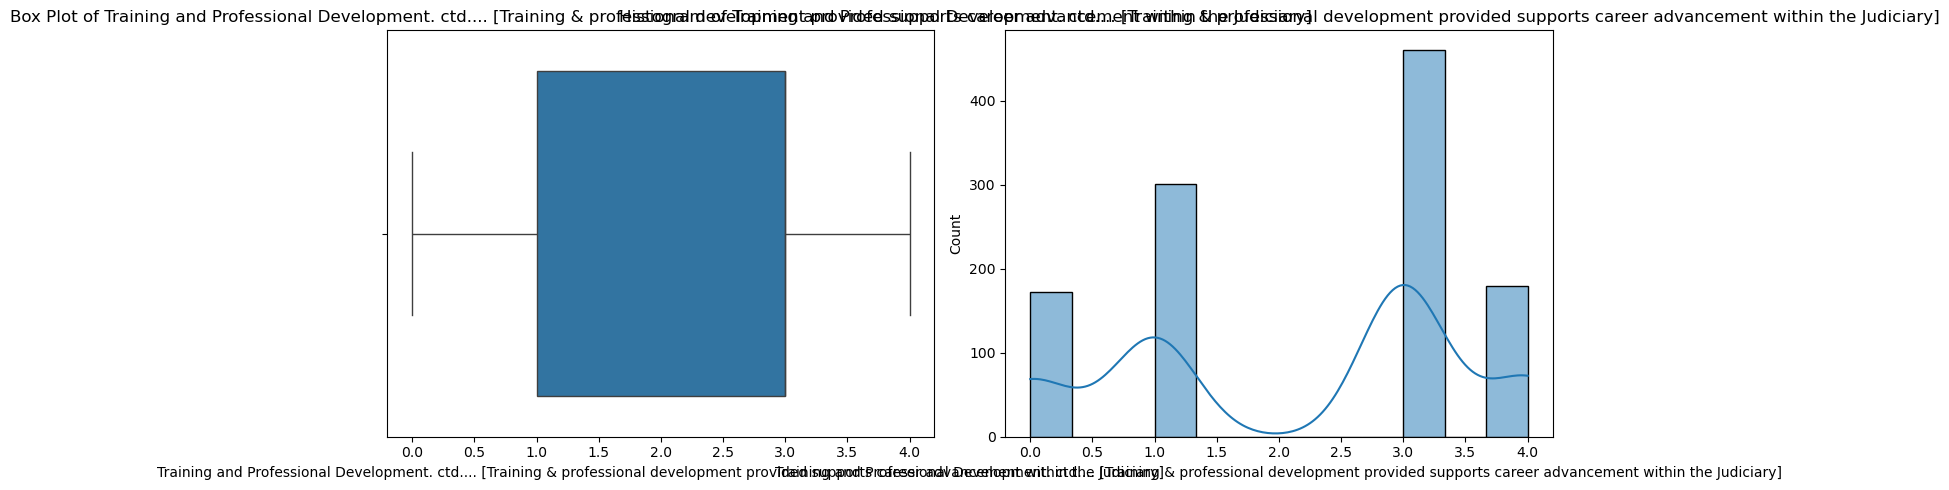

Visualizing distribution for column: 3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)


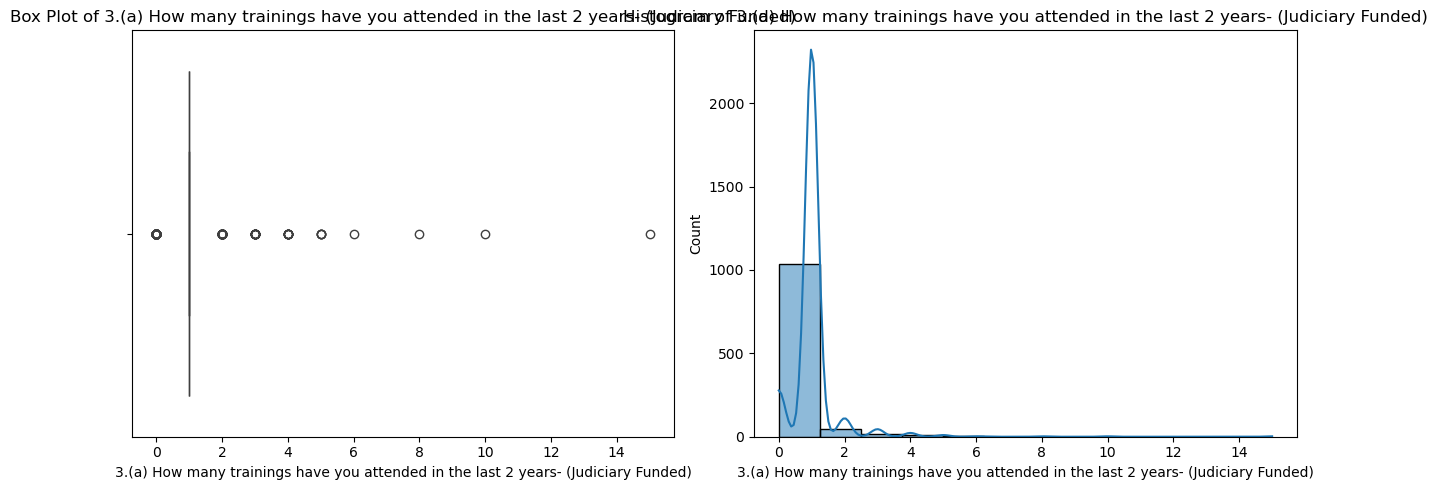

Visualizing distribution for column: 3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)


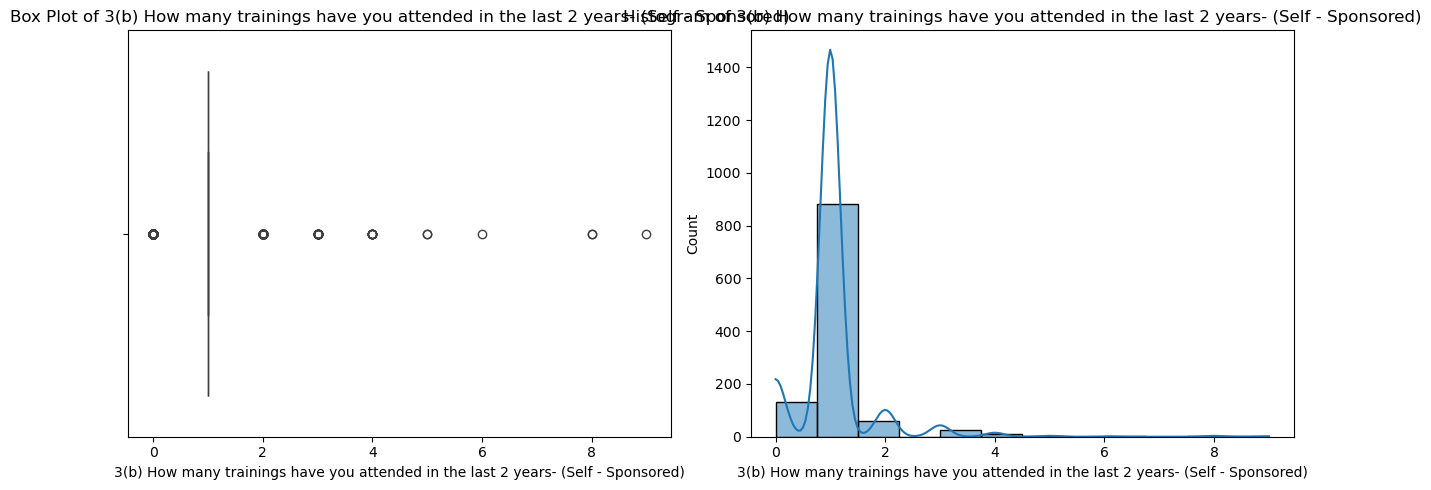

Visualizing distribution for column: D. Remuneration and Benefits [My remuneration is fair and competitive]


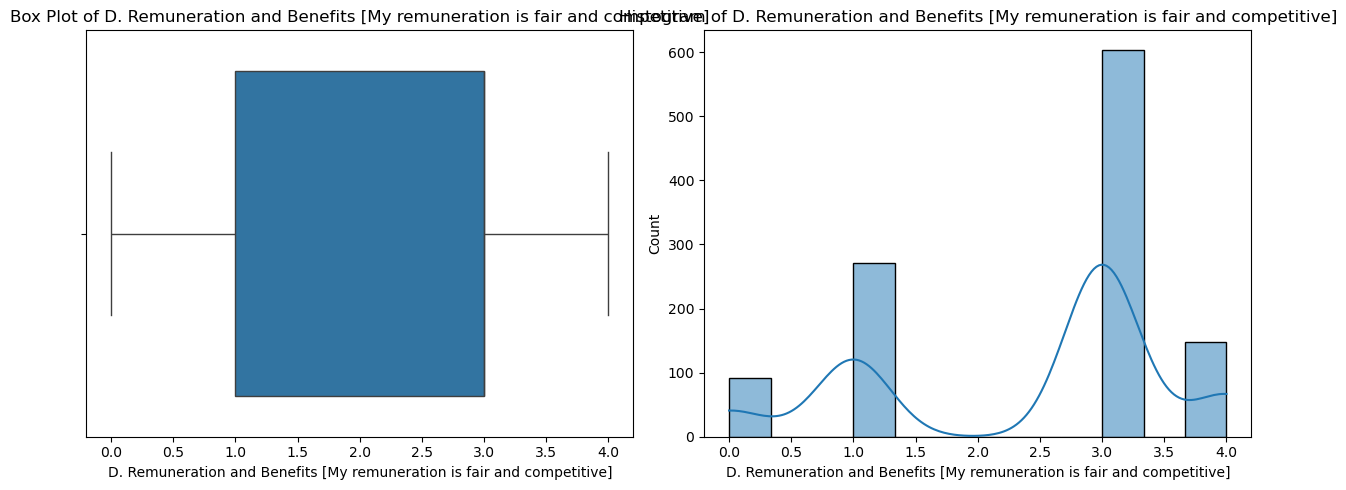

Visualizing distribution for column: D. Remuneration and Benefits [The Judiciary offers fair benefits- (Mortgage, car loan, retirement scheme, health insurance)]


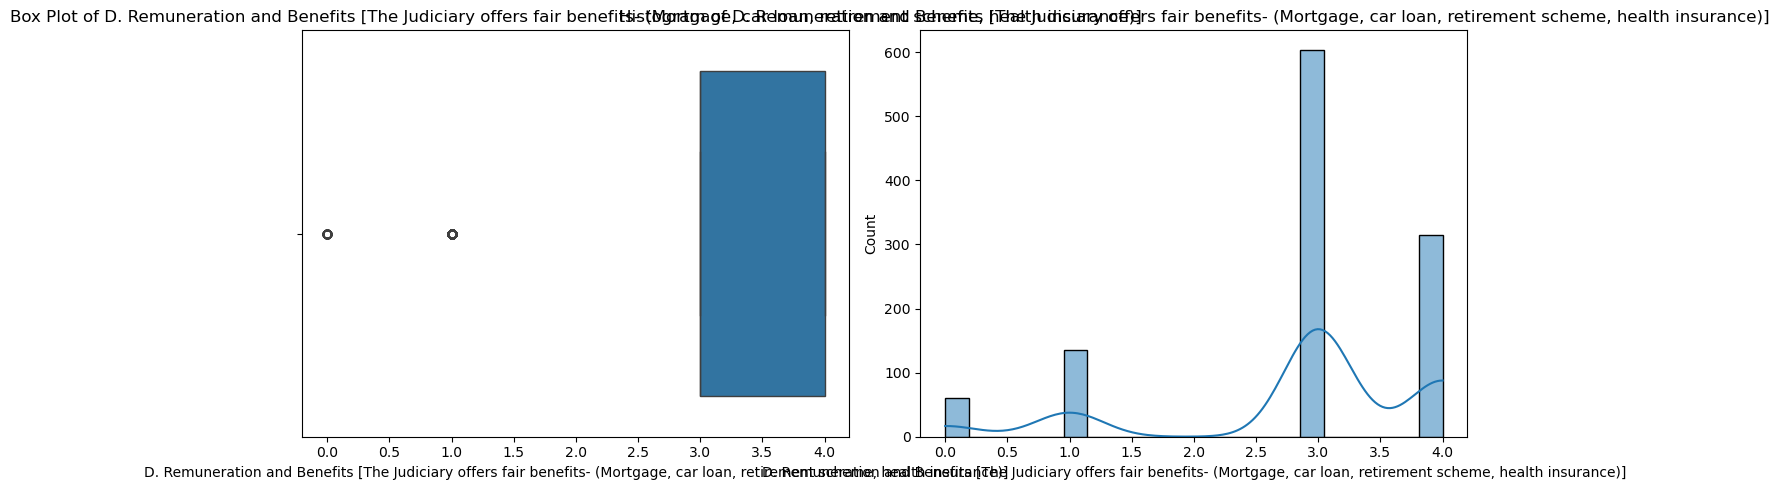

Visualizing distribution for column: E. Promotion and Career progression [Promotion at the Judiciary is fair and merit based]


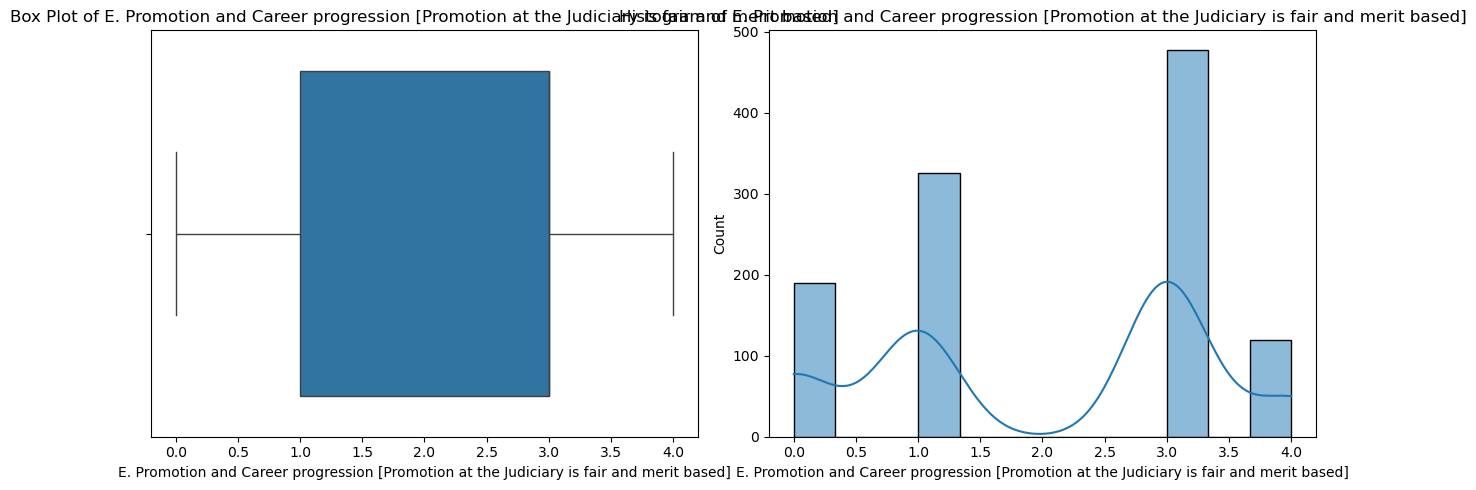

Visualizing distribution for column: E. Promotion and Career progression [The Judiciary adheres to its career progression scheme]


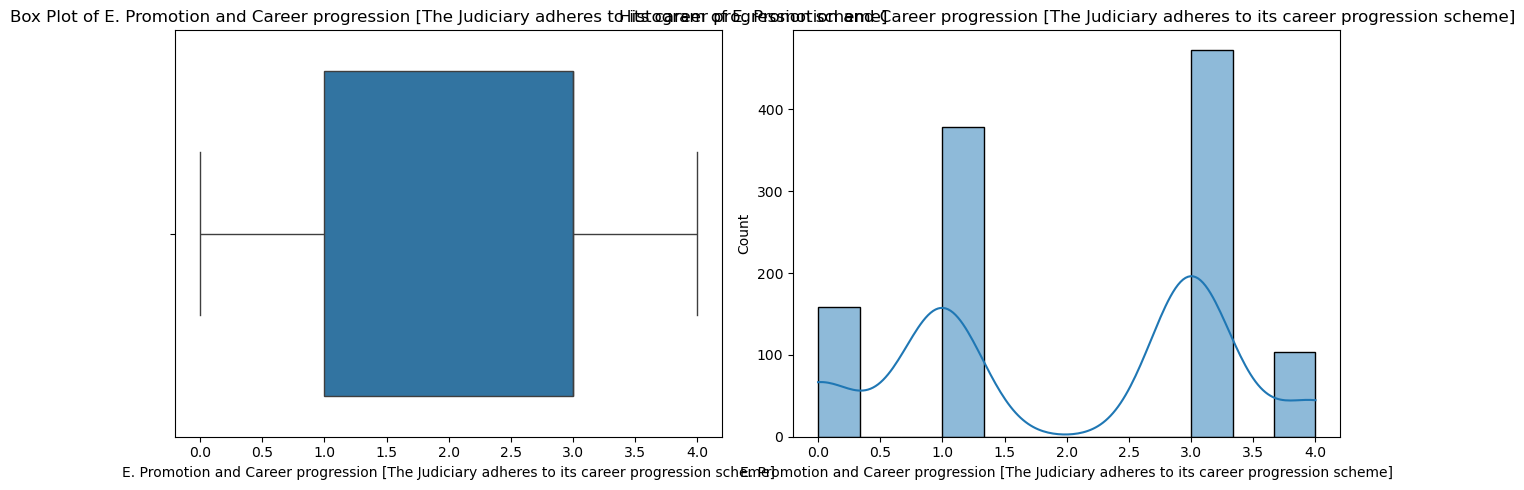

Visualizing distribution for column: E. Promotion and Career progression [I have an established career path at the Judiciary]


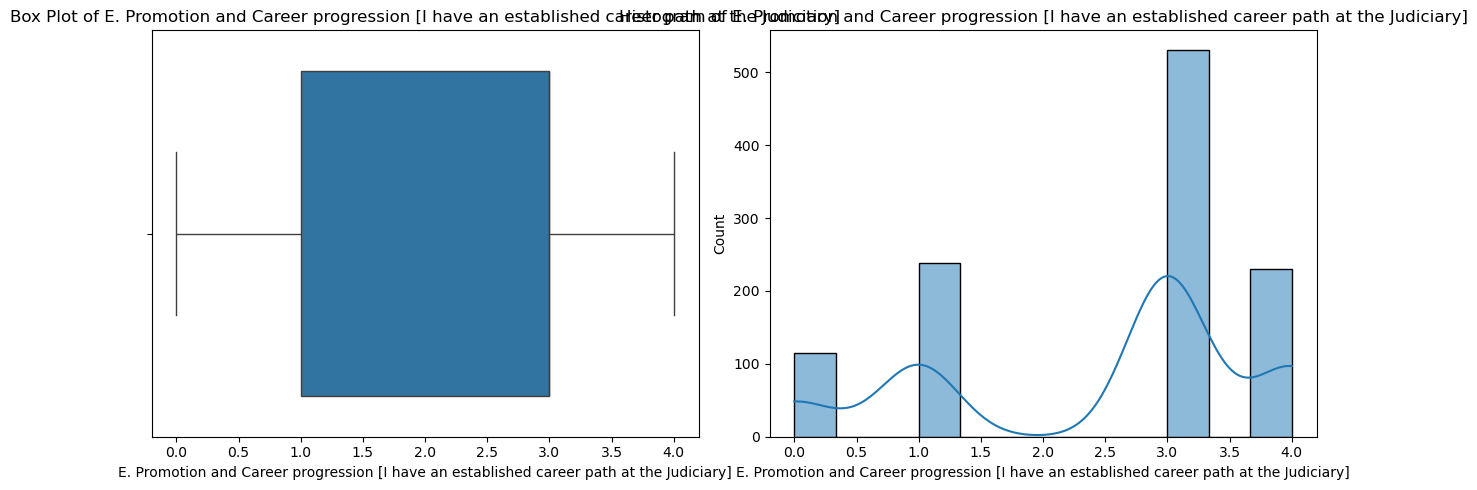

Visualizing distribution for column: F. Communication [There is effective information flow between Management and staff]


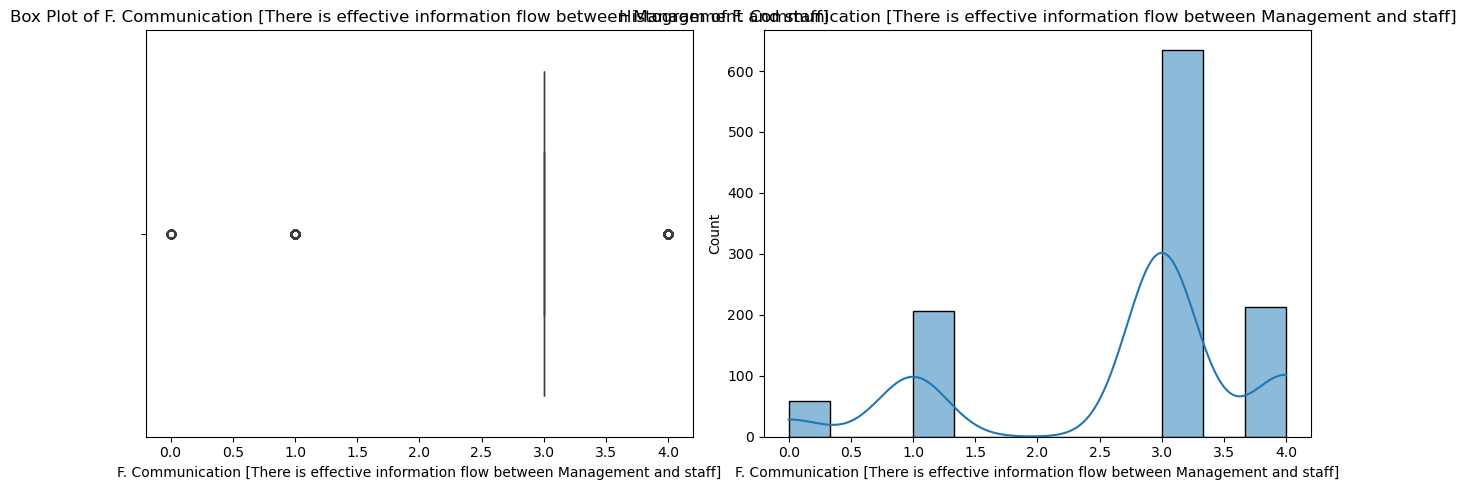

Visualizing distribution for column: F. Communication [There are adequate channels to voice opinions and concerns in the judiciary]


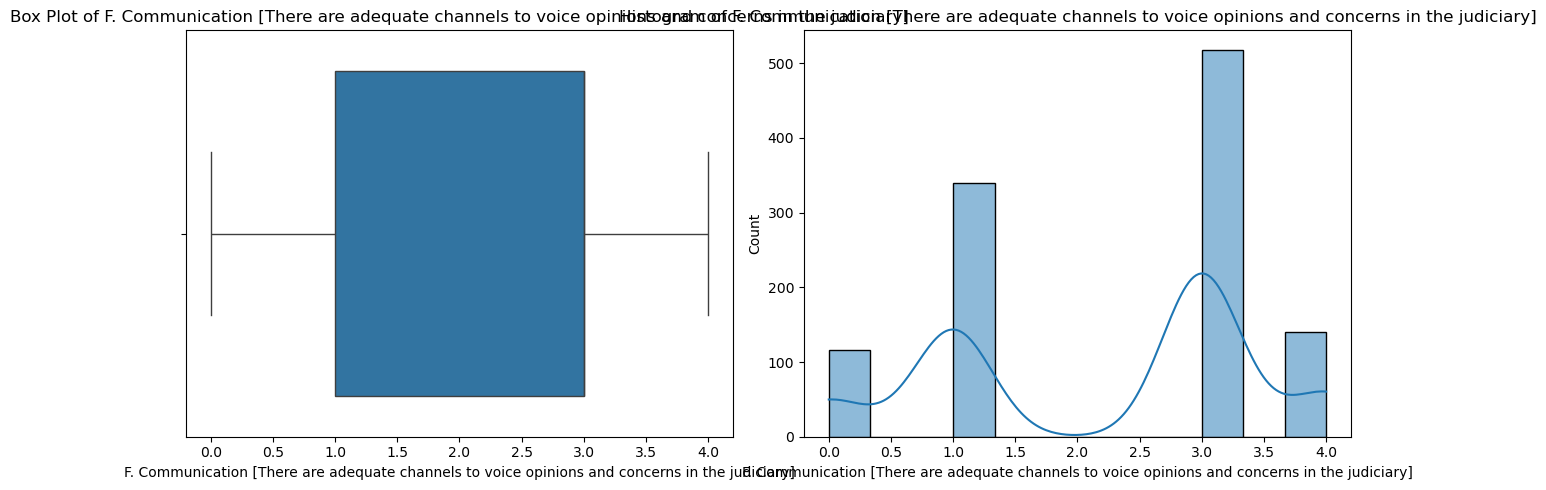

Skipping visualization for column '3. I often receive constructive feedback from my supervisor' due to insufficient non-null values (0).
Visualizing distribution for column: 1. Performance management and measurement initiatives are clear and comprehensive


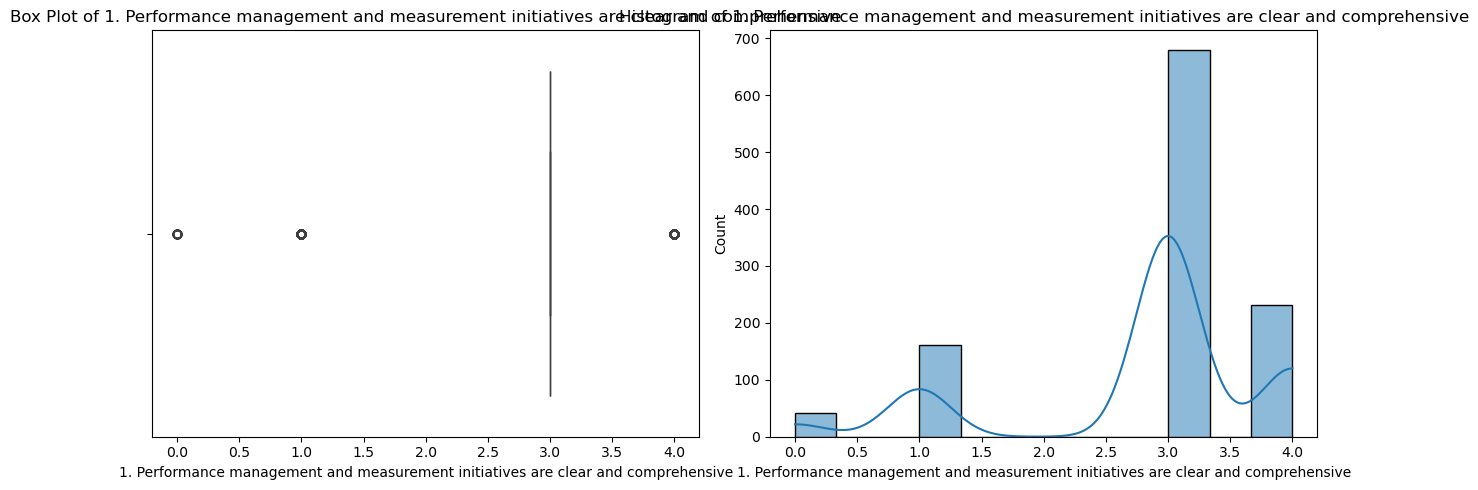

Visualizing distribution for column: Work Environment (Office and Equipment) [I have the equipment to do my job]


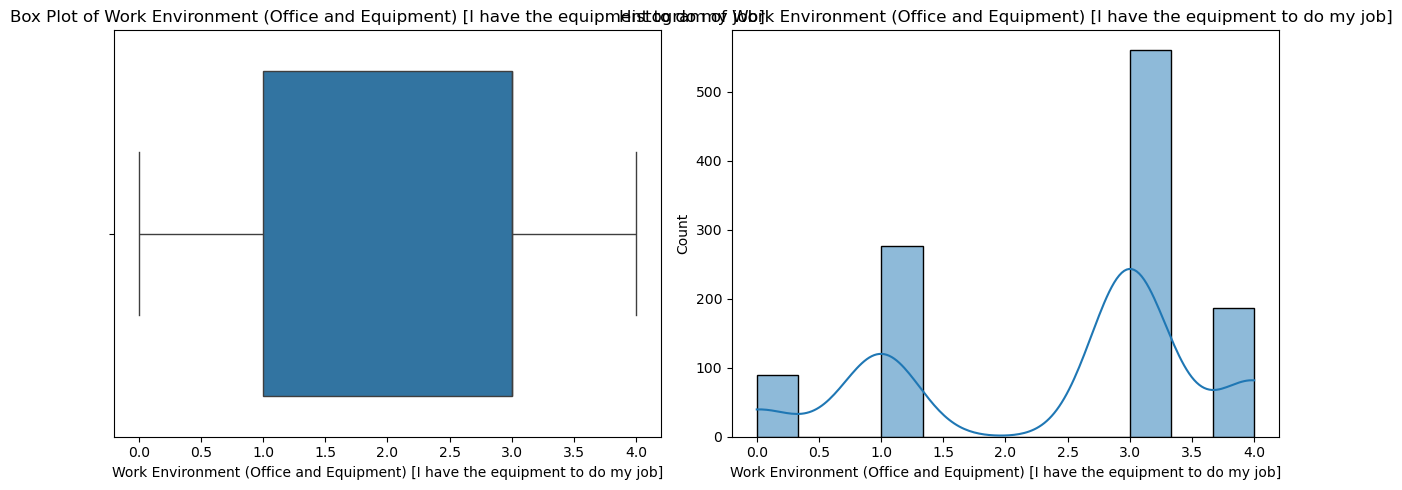

Visualizing distribution for column: Work Environment (Office and Equipment) [The safety and security measures put at my workplace are adequate]


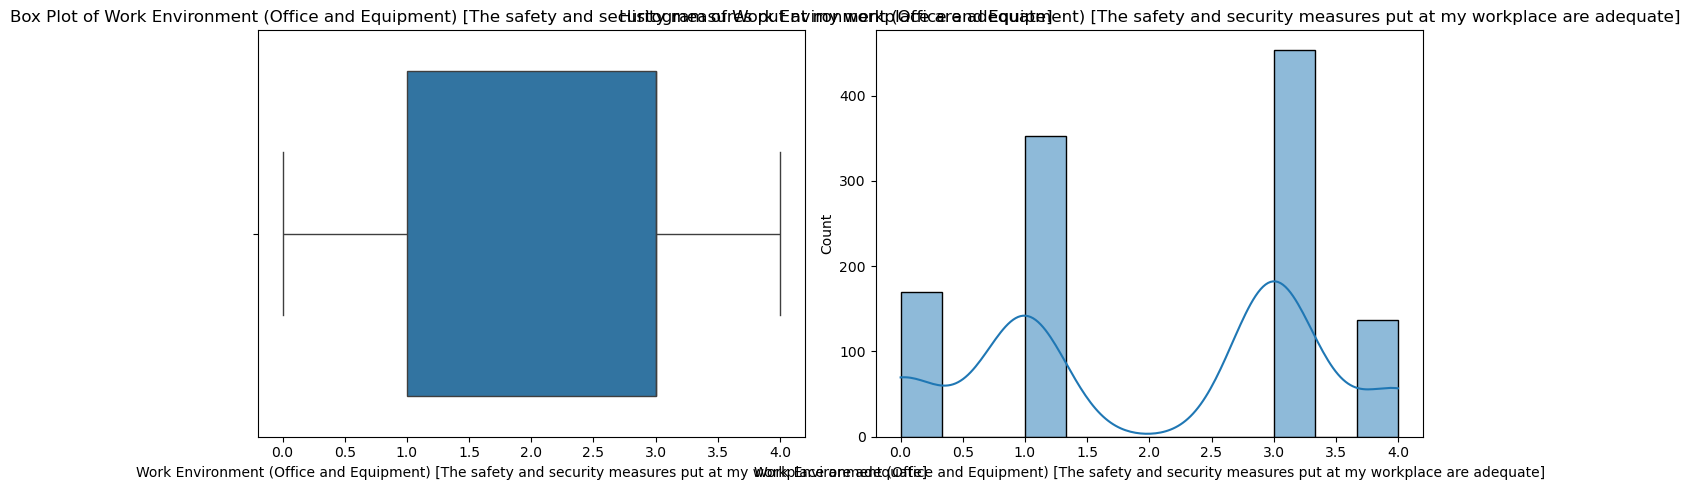

Skipping visualization for column '3. The work environment is friendly for Persons living with Disabilities' due to insufficient non-null values (0).
Visualizing distribution for column: Employee wellness and Work Life Balance. ctd... [I have support at work to balance my work and personal life]


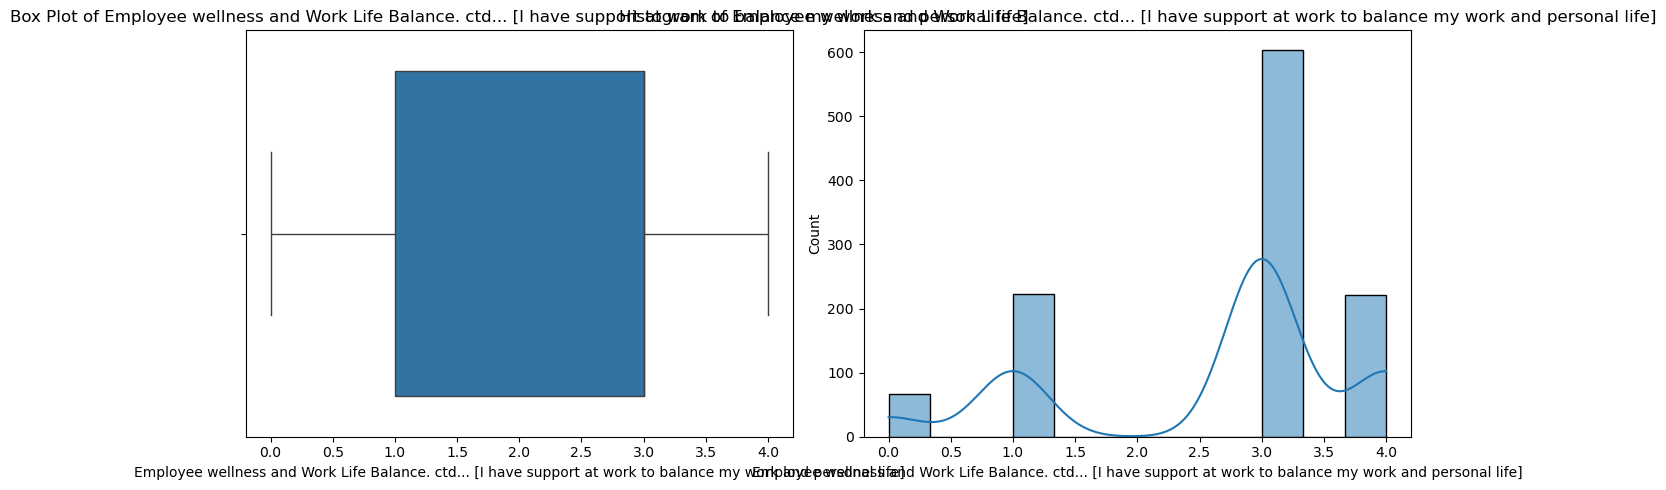

Visualizing distribution for column: Employee wellness and Work Life Balance. ctd... [I am allowed to take my annual leave when due]


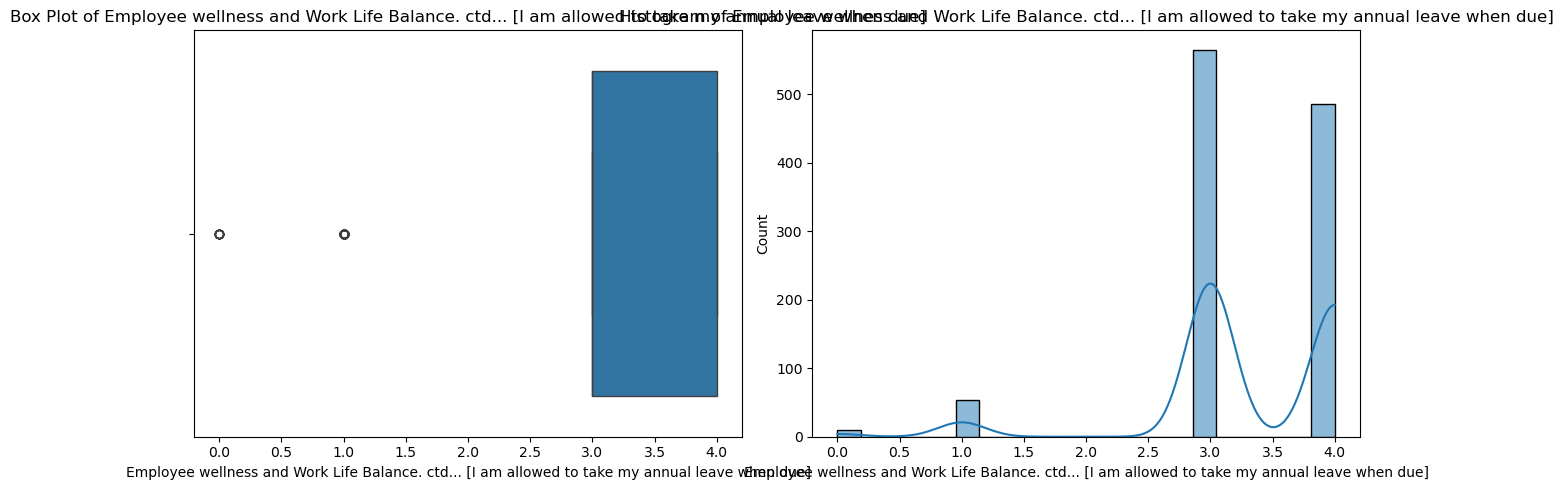

Visualizing distribution for column: Employee wellness and Work Life Balance. ctd... [The Judiciary annually organizes team building activities for employees]


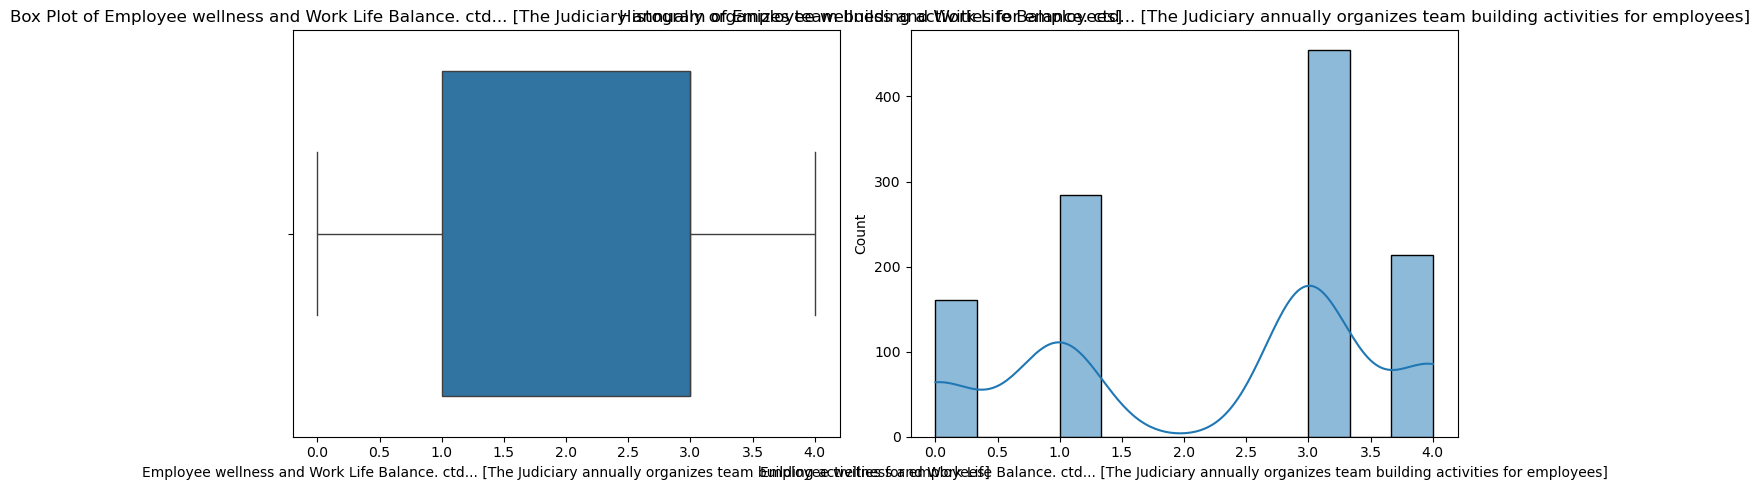

Visualizing distribution for column: Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]


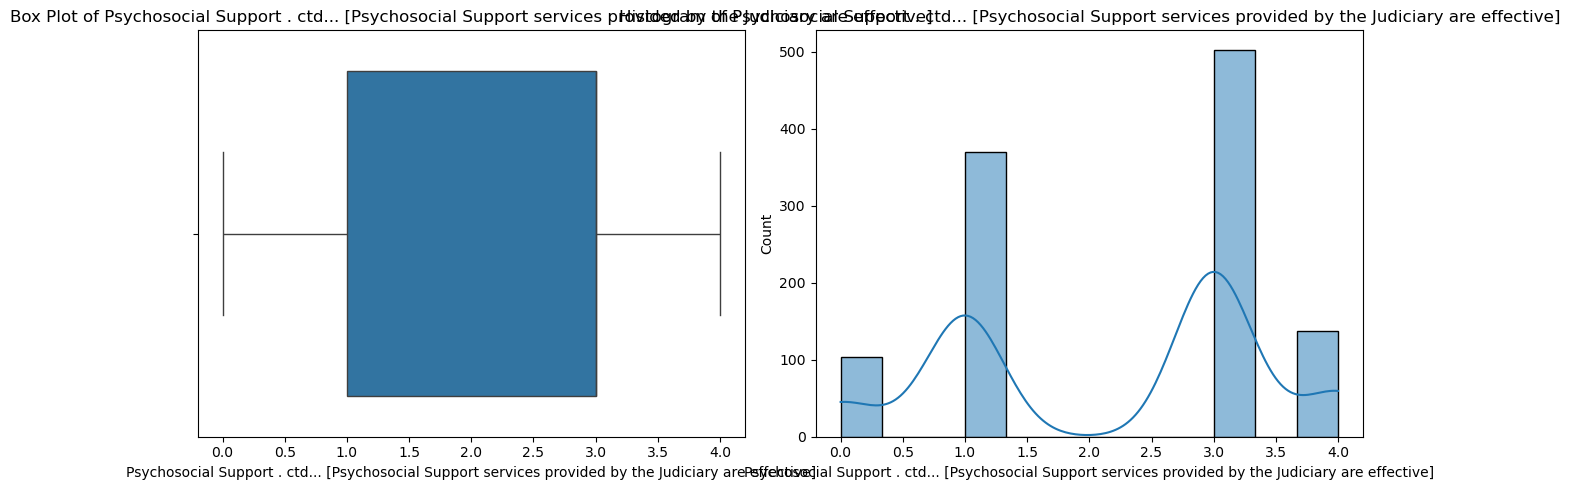

Visualizing distribution for column: Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]


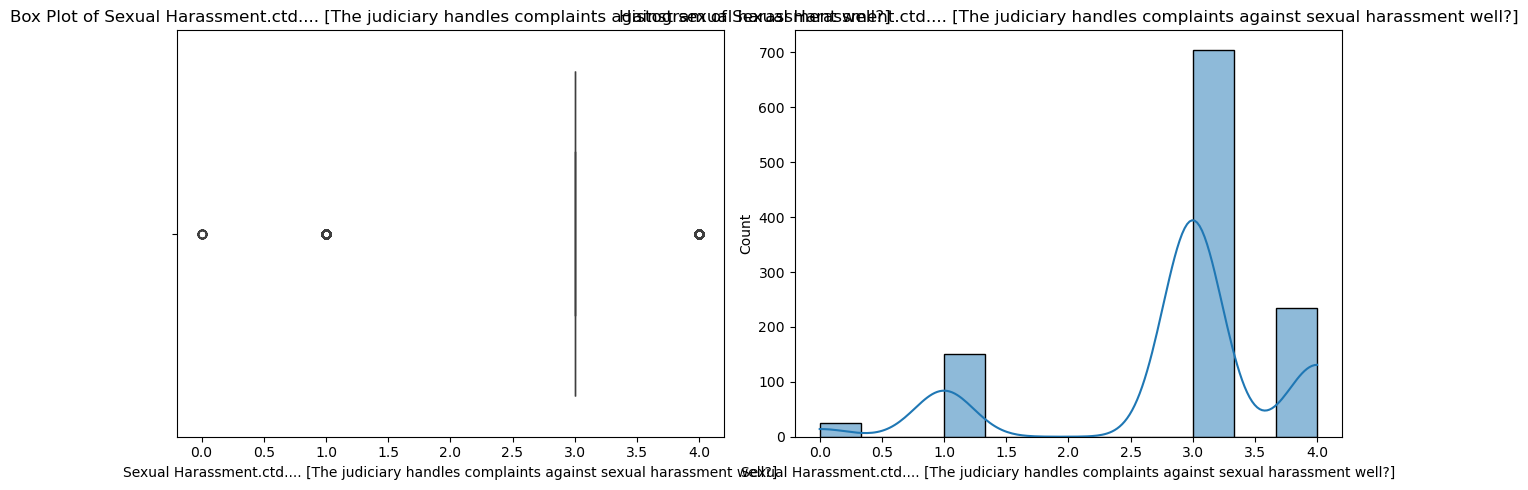

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical columns for outlier detection using box plots and histograms
# Skip columns with all NaN values or very few non-null values
min_valid_count = 10 # Define a minimum number of non-null values for visualization

for col in numerical_cols:
    if df[col].count() < min_valid_count:
        print(f"Skipping visualization for column '{col}' due to insufficient non-null values ({df[col].count()}).")
        continue

    print(f"Visualizing distribution for column: {col}")
    plt.figure(figsize=(12, 5))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

Applying outlier handling (capping) to the following columns:


['3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)',
 '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)']


Outlier detection for column: 3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)
  Q1: 1.0, Q3: 1.0, IQR: 0.0
  Lower Bound (IQR): 1.0
  Upper Bound (IQR): 1.0
  Number of outliers identified: 189
  Outliers in '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)' have been capped.

Outlier detection for column: 3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)
  Q1: 1.0, Q3: 1.0, IQR: 0.0
  Lower Bound (IQR): 1.0
  Upper Bound (IQR): 1.0
  Number of outliers identified: 233
  Outliers in '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)' have been capped.

Key statistics for outlier-handled numerical columns after capping:


,3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded),3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)
count,1114.0,1114.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0



Re-generating box plots for outlier-handled columns:


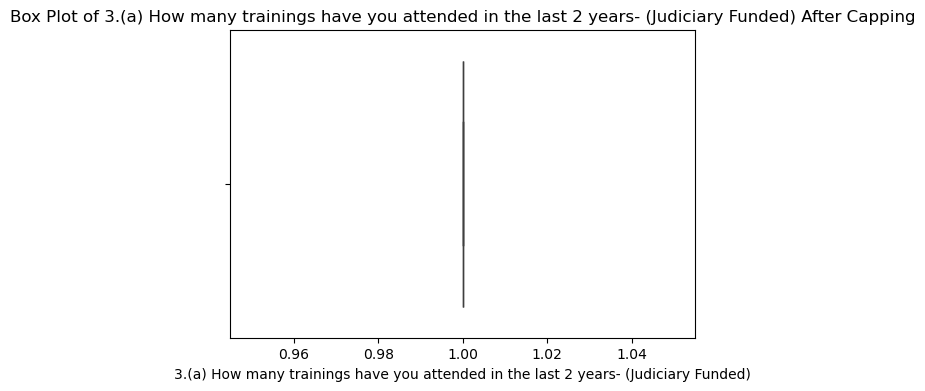

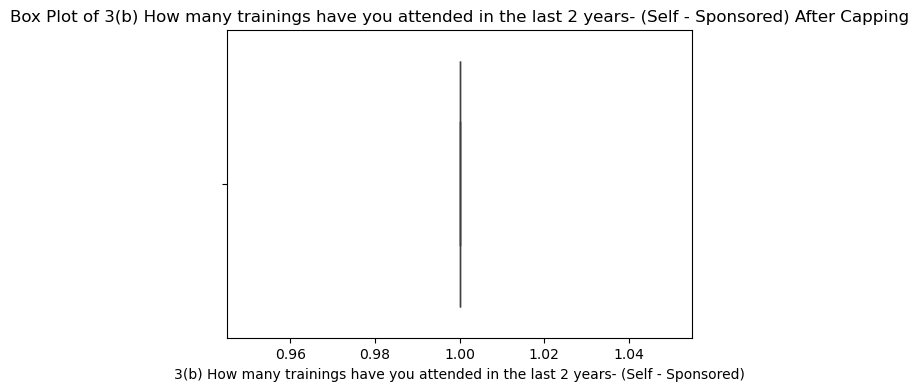

In [25]:
# Identify columns where outlier detection and handling are appropriate (based on visualizations)
# The scaled ordinal columns (age, education, agreement scales) represent categories,
# and extreme values within these scales are not typically treated as outliers to be removed or capped.
# The training count columns ('3.(a) How many trainings...', '3(b) How many trainings...')
# are count data and may have genuine outliers representing individuals with significantly more training.
# We will focus on these training count columns for outlier handling.

outlier_cols = [
    '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)',
    '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)'
]

print("Applying outlier handling (capping) to the following columns:")
display(outlier_cols)

# Define a strategy for identifying and handling outliers (IQR method and capping)
for col in outlier_cols:
    if df[col].count() < min_valid_count:
        print(f"Skipping outlier handling for column '{col}' due to insufficient non-null values ({df[col].count()}).")
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nOutlier detection for column: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound (IQR): {lower_bound}")
    print(f"  Upper Bound (IQR): {upper_bound}")

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Number of outliers identified: {len(outliers)}")
    # display(outliers[[col]]) # Optional: display the outlier values

    # Handle outliers by capping
    # Values below the lower bound are set to the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Values above the upper bound are set to the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    print(f"  Outliers in '{col}' have been capped.")

# Verify that outliers have been addressed by re-calculating statistics for affected columns
print("\nKey statistics for outlier-handled numerical columns after capping:")
display(df[outlier_cols].describe())

# Optionally, re-generate box plots for the affected columns to visually verify capping
print("\nRe-generating box plots for outlier-handled columns:")
for col in outlier_cols:
     if df[col].count() < min_valid_count:
        print(f"Skipping re-visualization for column '{col}' due to insufficient non-null values ({df[col].count()}).")
        continue

     plt.figure(figsize=(6, 4))
     sns.boxplot(x=df[col])
     plt.title(f'Box Plot of {col} After Capping')
     plt.show()

## 9. Cross-verify responses for consistency

In [27]:
# Print the current column names to identify the correct ones after previous cleaning and encoding steps.
print("Current DataFrame columns:")
display(df.columns.tolist())

# Use the correct column names after encoding:
staj_aware_col = '1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes'
staj_sensitized_col = '2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes'

# For Psychosocial Support and Sexual Harassment, use the _yes columns for awareness/familiarity (boolean), and the original columns for effectiveness/handling (ordinal-encoded).
psychosocial_aware_col = '1. I am aware of the Psychosocial Support services provided by the Judiciary_yes'
psychosocial_effective_col = 'Psychosocial Support . ctd... [Psychosocial Support services provided by the Judiciary are effective]'
harassment_familiar_col = '1. I am familiar with the sexual harassment policy for the Judiciary  _yes'
harassment_handling_col = 'Sexual Harassment.ctd.... [The judiciary handles complaints against sexual harassment well?]'

# Inconsistency 1: Awareness vs. Sensitization of STAJ Blueprint
inconsistent_staj_awareness_sensitization = df[(df[staj_aware_col] == False) & (df[staj_sensitized_col] == True)]

# Inconsistency 2: Awareness vs. Rating of Psychosocial Support Services
inconsistent_psychosocial_awareness_rating = df[(df[psychosocial_aware_col] == False) & (df[psychosocial_effective_col].notnull())]

# Inconsistency 3: Familiarity vs. Handling Rating of Sexual Harassment Policy
inconsistent_sexual_harassment_familiarity_rating = df[(df[harassment_familiar_col] == False) & (df[harassment_handling_col].notnull())]

# Display the inconsistent rows for examination
print("\nRows with inconsistent STAJ awareness and sensitization (Awareness = No, Sensitization = Yes):")
display(inconsistent_staj_awareness_sensitization)

print("\nRows with inconsistent Psychosocial Support awareness and effectiveness rating (Awareness = No, Rated Effectiveness):")
display(inconsistent_psychosocial_awareness_rating)

print("\nRows with inconsistent Sexual Harassment policy familiarity and handling rating (Familiarity = No, Rated Handling):")
display(inconsistent_sexual_harassment_familiarity_rating)

# Note: We are not modifying the DataFrame in this step, only identifying inconsistencies.

Current DataFrame columns:


['Timestamp',
 '2.(a) Which Directorate/Court Station are you currently working at?',
 '3. How long have you worked in the Judiciary (Tick one)',
 '5. Which age (in years) category do you belong to?  (Tick one)',
 '6. What is your highest level of education (Tick one)',
 'B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment]',
 'B. Job Satisfaction and Workload [My workload is manageable]',
 '3. My work contributes to the achievement of the Judiciary’s goals',
 '1. I am satisfied with the training and development opportunities provided by the Judiciary',
 'Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary]',
 '3.(a) How many trainings have you attended in the last 2 years- (Judiciary Funded)',
 '3(b) How many trainings have you attended in the last 2 years- (Self - Sponsored)',
 '4. How can the Judiciary improve on training and development of staff?',
 'D. Remu


Rows with inconsistent STAJ awareness and sensitization (Awareness = No, Sensitization = Yes):


,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
813,2025-02-13 15:57:57,tamu law courts,NaN,NaN,4.0,3,3,NaN,NaN,3,...,False,False,False,False,True,False,True,False,True,False



Rows with inconsistent Psychosocial Support awareness and effectiveness rating (Awareness = No, Rated Effectiveness):


,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
7,2024-11-14 14:35:27,court annexed mediation,NaN,NaN,3.0,4,4,NaN,NaN,1,...,False,False,False,False,False,True,False,False,False,False
20,2024-11-14 14:58:53,ict,NaN,NaN,3.0,3,3,NaN,NaN,3,...,False,False,False,False,True,True,True,False,True,False
25,2024-11-14 15:23:12,lamu law courts,NaN,NaN,4.0,1,1,NaN,NaN,0,...,False,False,False,False,True,True,False,False,True,False
27,2024-11-14 15:23:25,machakos,NaN,NaN,4.0,4,3,NaN,NaN,1,...,False,False,False,False,True,True,True,False,True,False
31,2024-11-14 15:31:07,nyamira law courts,NaN,NaN,4.0,3,3,NaN,NaN,4,...,False,False,False,False,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2025-02-25 18:41:21,kitui law courts,NaN,NaN,1.0,3,3,NaN,NaN,1,...,False,False,False,False,True,True,False,False,True,False
1094,2025-02-27 15:13:40,ngong law courts,NaN,NaN,4.0,1,3,NaN,NaN,1,...,False,False,False,False,True,True,False,False,True,False
1096,2025-02-28 17:22:56,kahawa law court,NaN,NaN,1.0,4,4,NaN,NaN,4,...,False,False,False,False,False,True,False,False,True,False
1110,2025-04-11 11:04:31,dspop,NaN,NaN,4.0,3,3,NaN,NaN,0,...,False,False,False,False,True,True,False,False,True,False



Rows with inconsistent Sexual Harassment policy familiarity and handling rating (Familiarity = No, Rated Handling):


,Timestamp,2.(a) Which Directorate/Court Station are you currently working at?,3. How long have you worked in the Judiciary (Tick one),5. Which age (in years) category do you belong to? (Tick one),6. What is your highest level of education (Tick one),B. Job Satisfaction and Workload [The work that I do gives me a sense of accomplishment],B. Job Satisfaction and Workload [My workload is manageable],3. My work contributes to the achievement of the Judiciary’s goals,1. I am satisfied with the training and development opportunities provided by the Judiciary,Training and Professional Development. ctd.... [Training & professional development provided supports career advancement within the Judiciary],...,2.(b) Type of Court/ Adminstrative Unit_small claims,2.(b) Type of Court/ Adminstrative Unit_supreme court,2.(b) Type of Court/ Adminstrative Unit_tribunals,4. What is your Gender? (Tick one)_intersex,4. What is your Gender? (Tick one)_male,1. Are you aware of the Social Transformation Through Access to Justice (STAJ) Blueprint?_yes,2. Have you been sensitized on the Social Transformation Through Access to Justice (STAJ) Blueprint? _yes,1. I am aware of the Psychosocial Support services provided by the Judiciary_yes,1. I am familiar with the sexual harassment policy for the Judiciary _yes,2. Have you experienced sexual harassment?_yes
1,2024-11-03 18:26:08,bomet,NaN,NaN,1.0,4,4,NaN,NaN,3,...,False,False,False,False,False,True,True,True,False,False
7,2024-11-14 14:35:27,court annexed mediation,NaN,NaN,3.0,4,4,NaN,NaN,1,...,False,False,False,False,False,True,False,False,False,False
15,2024-11-14 14:51:28,hr,NaN,NaN,4.0,3,3,NaN,NaN,1,...,False,True,False,False,False,True,False,True,False,False
36,2024-11-14 15:36:18,malaba,NaN,NaN,3.0,3,3,NaN,NaN,1,...,False,False,False,False,True,True,False,False,False,False
51,2024-11-14 16:05:50,elrc nairobi,NaN,NaN,3.0,3,3,NaN,NaN,3,...,False,False,False,False,False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2025-02-19 12:35:45,milimani,NaN,NaN,4.0,3,1,NaN,NaN,3,...,False,False,False,False,False,False,False,True,False,True
1088,2025-02-25 15:57:39,kitui law court,NaN,NaN,1.0,4,3,NaN,NaN,1,...,False,False,False,False,True,True,True,True,False,False
1097,2025-03-03 12:00:21,nyahururu,NaN,NaN,4.0,3,3,NaN,NaN,0,...,False,False,False,False,False,True,False,True,False,False
1101,2025-04-09 10:30:25,office of the chief registrar,NaN,NaN,4.0,3,3,NaN,NaN,0,...,False,False,False,False,True,True,False,True,False,False


## 10. Ethical and privacy checks

In [28]:
# Acknowledging the importance of ethical considerations and data privacy
print("Ethical Considerations and Data Privacy:")
print("Data privacy and ethical considerations are paramount when working with sensitive survey data, such as employee feedback.")
print("In this project, adherence to principles of data protection is guided by the Data Protection Act.")

# Outlining key ethical considerations
print("\nKey Ethical Considerations:")
print("- Informed Consent: It is assumed that informed consent was obtained from all participants before collecting their data.")
print("- Data Anonymization/Pseudonymization: To protect participant identities, direct identifiers (like Email Address, which was dropped) have been removed. Further anonymization or pseudonymization may be necessary depending on the level of granularity required for analysis and reporting.")
print("- Avoiding Discriminatory Practices: Analysis and reporting should be conducted in a way that avoids bias and discriminatory practices, ensuring findings are not used to unfairly target or disadvantage specific groups of employees.")
print("- Transparency: Be transparent about how the data is used and for what purpose.")

# Describing steps for compliance with the Data Protection Act
print("\nSteps for Compliance with the Data Protection Act:")
print("- Secure Storage: The dataset should be stored in a secure environment with appropriate access controls to prevent unauthorized access.")
print("- Limiting Access: Access to the dataset should be limited to authorized personnel who require it for the purpose of this analysis.")
print("- Data Retention Policy: A clear data retention policy should be in place, specifying how long the data will be stored and when it will be securely disposed of.")
print("- Data Minimization: Only collect and retain data that is necessary for the specified purpose.")
print("- Data Subject Rights: Be prepared to address data subject rights, such as the right to access, rectification, or erasure of their data, in accordance with the Act.")

# Mentioning limitations and assumptions
print("\nLimitations and Assumptions:")
print("- The primary limitation is the lack of direct access to the original data collection process and consent forms. It is assumed that all necessary legal and ethical requirements, including informed consent, were met during data collection.")
print("- It is assumed that the dataset provided is a de-identified version, although some potentially indirectly identifiable information (like detailed location or specific job titles if they have very few individuals) might still exist.")
print("- This outline provides general steps; a comprehensive privacy and ethical review would require detailed knowledge of the data collection methodology, storage infrastructure, and specific use cases for the analysis results.")

Ethical Considerations and Data Privacy:
Data privacy and ethical considerations are paramount when working with sensitive survey data, such as employee feedback.
In this project, adherence to principles of data protection is guided by the Data Protection Act.

Key Ethical Considerations:
- Informed Consent: It is assumed that informed consent was obtained from all participants before collecting their data.
- Data Anonymization/Pseudonymization: To protect participant identities, direct identifiers (like Email Address, which was dropped) have been removed. Further anonymization or pseudonymization may be necessary depending on the level of granularity required for analysis and reporting.
- Avoiding Discriminatory Practices: Analysis and reporting should be conducted in a way that avoids bias and discriminatory practices, ensuring findings are not used to unfairly target or disadvantage specific groups of employees.
- Transparency: Be transparent about how the data is used and for what 